# Introduction

This notebook is based on the Time series data preparation notebook created by Ignacio Oguiza - email: oguiza@timeseriesAI.co.

## Import libraries 📚

Since some of you have been asking questions as to how to prepare your data to be able to use timeserisAI, I've prepared a short tutorial to address this.

There are endless options in terms of how your source data may be stored, so I'll cover a few of the most frequent ones I've seen. I may be expanding this in the future if needed.

In [2]:
# # **************** UNCOMMENT AND RUN THIS CELL IF YOU NEED TO INSTALL/ UPGRADE TSAI ****************
stable = True # Set to True for latest pip version or False for main branch in GitHub
!pip install {"tsai -U" if stable else "git+https://github.com/timeseriesAI/tsai.git"} >> /dev/null

El sistema no puede encontrar la ruta especificada.


In [3]:
# prompt: Version de scikit learn utilizada?
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import sys
import os

print(sklearn.__version__)
print(np.__version__)
print(pd.__version__)
print(matplotlib.__version__)

1.5.1
1.26.4
2.1.4
3.8.0


In [4]:
from tsai.all import *
computer_setup()

os              : Windows-10-10.0.26100-SP0
python          : 3.11.7
tsai            : 0.3.9
fastai          : 2.7.16
fastcore        : 1.5.55
torch           : 2.2.2+cu118
device          : 1 gpu (['NVIDIA GeForce RTX 4060 Laptop GPU'])
cpu cores       : 14
threads per cpu : 1
RAM             : 31.63 GB
GPU memory      : [8.0] GB


## Required input shape 🔶

To be able to use timeseriesAI your data needs to have 3 dimensions:

* **number of samples**
* **number of features** (aka variables, dimensions, channels)
* **number of steps** (or length, time steps, sequence steps)

There are a few convenience functions that you may want to use to prepare your data.

We are going to see how you could prepare your data in a few scenarios.

**Note: I've recently modified timeseriesAI so that you can also use 2d input data in the case of univariate time series (they'll be converted to 3d internally), although you can still pass univariate time series as 3d or pass them if you prefer. You'll get the same result.**

In [7]:
# Set runningOnColab = True if you are running this a google colab session.
runningOnColab = False

if runningOnColab:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append('drive/My Drive/TFM/')

    os.chdir('drive/MyDrive/TFM')

# SGCC time series data

In [8]:
!pwd

"pwd" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [5]:
import sys  
sys.path.insert(1, '../Utils')

from data import get_processed_dataset

In [12]:
df = get_processed_dataset('../Datasets/data.csv')
df.head()

2014-01-06 00:00:00  2014-01-07 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.610321             0.590786   

                                  2014-01-08 00:00:00  2014-01-09 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.526703             0.520408   

                                  2014-01-10 00:00:00  2014-01-11 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.529022             0.547222   

                                  2014-01-12 00:00:00  2014-01-13 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.566903             0.505787   

                                  2014-01-14 00:00:00  2014-01-15 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.550109             0.519241   

                                  ...  2016-10-23 00:00:00  \
CONS_NO                           ...                        
0387DD8A07E07FDA6271170F86AD9151  ...             0.681194   
01D6177B5D4FFE0CABA9EF17DAFC2B84  ...             0.000000   
4B75AC4F2D8434CFF62DB64D0BB43103  ...             0.888909   
B32AC8CC6D5D805AC053557AB05F5343  ...             0.871700   
EDFC78B07BA2908B3395C4EB2304665E  ...             0.765607   

                                  2016-10-24 00:00:00  2016-10-25 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.730050             0.782126   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
4B75AC4F2D8434CFF62DB64D0BB43103             0.888927             0.888920   
B32AC8CC6D5D805AC053557AB05F5343             0.888922             0.888898   
EDFC78B07BA2908B3395C4EB2304665E             0.748578             0.610797   

                                  2016-10-26 00:00:00  2016-10-27 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151             0.563406             0.720588   
01D6177B5D4FFE0CABA9EF17DAFC2B84             0.000000             0.000000   
4B75A

In [27]:
df

2014-01-06 00:00:00  2014-01-07 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.610321             0.590786   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C                  NaN                  NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.634544             0.495863   
A9A0FE83467A680FBFB0DBFC910DF227             0.379419             0.358824   
D9A6ADA018FA46A55D5438370456AA45             0.888997             0.888961   
F3406636BAD1E6E0826E8EDDC9A1BF00                  NaN                  NaN   

                                  2014-01-08 00:00:00  2014-01-09 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.526703             0.520408   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C                  NaN                  NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.548803             0.634259   
A9A0FE83467A680FBFB0DBFC910DF227             0.340909             0.386473   
D9A6ADA018FA46A55D5438370456AA45             0.889228             0.858651   
F3406636BAD1E6E0826E8EDDC9A1BF00                  NaN                  NaN   

                                  2014-01-10 00:00:00  2014-01-11 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.529022             0.547222   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C                  NaN                  NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.580530             0.555000   
A9A0FE83467A680FBFB0DBFC910DF227             0.377778             0.422597   
D9A6ADA018FA46A55D5438370456AA45             0.888896             0.886260   
F3406636BAD1E6E0826E8EDDC9A1BF00                  NaN                  NaN   

                                  2014-01-12 00:00:00  2014-01-13 00:00:00  \
CONS_NO                                                                      
0387DD8A07E07FDA6271170F86AD9151                  NaN                  NaN   
01D6177B5D4FFE0CABA9EF17DAFC2B84                  NaN                  NaN   
4B75AC4F2D8434CFF62DB64D0BB43103                  NaN                  NaN   
B32AC8CC6D5D805AC053557AB05F5343                  NaN                  NaN   
EDFC78B07BA2908B3395C4EB2304665E             0.566903             0.505787   
...                                               ...                  ...   
F1472871E1AFF49D4289564B6377D76C                  NaN                  NaN   
F3C8BBCD2DC26C1E0249DEEF6A4256B7             0.000000             0.000000   
A9A0FE83467A680FBFB0DBFC910DF227             0.356406             0.323232   
D9A6ADA018FA46A55D5438370456AA45             0.888900             0.888890   
F3406636BAD1E6E0826E8EDDC9A1BF00                  NaN

## Data Processing

### Interpolation

In [ ]:
def median_interpolation(series):
    series = series.copy()

    # Create a boolean mask where values are NaN
    nan_mask = pd.isna(series)

    # Create an array of the indices of non-NaN values
    not_nan_indices = np.where(~nan_mask)[0]

    # Handle NaNs at the beginning and end by filling them with 0
    series[nan_mask] = 0

    # For each NaN, find the indices of previous and next non-NaN values
    for idx in np.where(nan_mask)[0]:
        # Find the closest non-NaN values before and after the NaN
        prev_value = series[idx - 1] if idx > 0 else np.nan
        next_value = series[idx + 1] if idx < len(series) - 1 else np.nan

        # Replace NaN with the median of the adjacent values if both are not NaN
        if not pd.isna(prev_value) and not pd.isna(next_value):
            series[idx] = np.median([prev_value, next_value])

    return series

In [ ]:
df_processed = df.iloc[:,:-1].apply(median_interpolation, axis=1)

In [ ]:
df_processed['flags'] = df['flags']

In [ ]:
df_processed

### Quantile transformation

In [ ]:
from sklearn.preprocessing import quantile_transform

"""## Quantile transform"""
quantile = quantile_transform(df_processed.values, n_quantiles=10, random_state=0, copy=True, output_distribution='uniform')
df_processed = pd.DataFrame(data=quantile, columns=df_processed.columns, index=df_processed.index)

# 📌 Save or load datasets

In [6]:
# import sys  
sys.path.insert(1, '../Utils')
from data import get_processed_dataset, save_file, load_file

In [14]:
# df_red_processed = load_file('datasets/sgcc_processed', 'data')
# data_binmaks = load_file('datasets/sgcc_processed', 'data_binmask')
# data_binmask_dayofweek = load_file('datasets/sgcc_processed', 'data_binmask_dayofweek')
# df_processedq = load_file('datasets/sgcc_processed_quantile', 'data_binmask')

In [7]:
'''
  data preprocessed with triple mask normalized
'''
data_triplemask = load_file('../Datasets/sgcc_processed', 'data_triple_mask_normalized')
label_red = load_file('../Datasets/sgcc_processed', 'labels')

In [ ]:
'''
  tsfresh features extracted from dataset preprocessed
'''
features_extracted = load_file('datasets/tsfresh_features','tsfresh_features')
important_features = load_file('datasets/tsfresh_features','tsfresh_important_features')
label_red = load_file('datasets/sgcc_processed', 'labels')

In [ ]:
'''
  Important features extracted from training data augmented and test data.
'''
# X_train = load_file('datasets/sgcc_processed', 'X_train_aug')
# X_test = load_file('datasets/sgcc_processed', 'X_test')

y_train = load_file('datasets/sgcc_processed', 'y_train_aug')
y_test = load_file('datasets/sgcc_processed', 'y_test')

X_train = load_file('features', 'tsfresh_important_features_from_trainaug')
y_test = load_file('features', 'tsfresh_important_features_from_test')

In [ ]:
# save_file(df_processed.iloc[:,:-1], '/content/drive/My Drive/TFM/datasets/sgcc_interpolation_quantiletransform','full_dataset')
# save_file(df_processed.iloc[:,-1], '/content/drive/My Drive/TFM/datasets/sgcc_interpolation_quantiletransform','full_dataset_label')

In [ ]:
# important_features_week = load_file('/content/drive/My Drive/TFM/datasets/tsfresh_features','important_features_weeks')

# Data Augmentation

### SMOTENC

In [ ]:
y_train_val.value_counts()

FLAG
0    33210
1     2956
Name: count, dtype: int64

In [ ]:
'''
  This took too much time. The execution on Colab with GPU never finished, the environment was disconnected or the time excced the time limit.
'''
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features=[0,1], random_state=42)
X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train_val, y_train_val)

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
df_aug = X_train_resampled.copy()
df_aug['flags'] = y_train_resampled

In [ ]:
y_train.sum()

2628

In [ ]:
y_train_resampled.sum()

29520

In [ ]:
# save_file(X_train_resampled,'datasets/sgcc_processed_trainaug','train')
# save_file(y_train_resampled,'datasets/sgcc_processed_trainaug','train_labels')
# save_file(X_test,'datasets/sgcc_processed_trainaug','test')
# save_file(y_test,'datasets/sgcc_processed_trainaug','test_labels')

## Split dataset [TSAI]

Transform data to the required format for TSAI

In [14]:
# X, y = df2xy(df_processedq, target_col='flags')

In [8]:
X = data_triplemask
y = label_red.values

In [ ]:
'''
  7 days are the features, 147 the timesteps
'''
# X = X.reshape(X.shape[0], 7, 147)

'\n  7 days are the features, 147 the timesteps\n'

In [16]:
X.shape, y.shape

((40185, 3, 1029), (40185,))

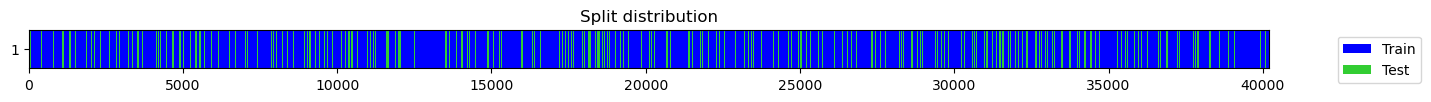

((#32148) [8839,9257,12160,18689,2824,18949,2052,9692,4370,33046...],
 (#8037) [22566,14818,18371,34395,11852,39941,26934,5099,28773,27772...])

In [9]:
splits = get_splits(y, n_splits=1, valid_size=.2, stratify=True, shuffle=True, check_splits=True, random_state=42)
splits

In [18]:
splits[0] # Train
splits[1] # Valid

(#8037) [22566,14818,18371,34395,11852,39941,26934,5099,28773,27772...]

In [33]:
len(splits[1])

8037

In [28]:
import pickle

with open('splits.pkl', 'wb') as f:
    pickle.dump(splits, f)

In [25]:
index = 0
print(f"Fraudulent instances in training {y[splits[0]].sum()} from {len(splits[0])}") #{len(splits[index][0])}
print(f"Fraudulent instances in validation {y[splits[1]].sum()} from {len(splits[1])}") #{len(splits[index][1])}

Fraudulent instances in training 2628 from 32148
Fraudulent instances in validation 657 from 8037


## Split manually

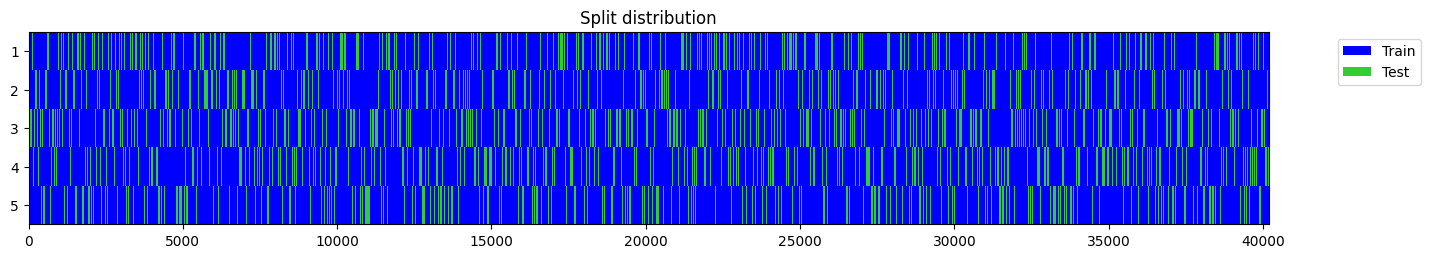

Fold 1


In [ ]:
from fastai.callback.core import Callback
from imblearn.over_sampling import SMOTENC

# Apply SMOTE-NC to the training data
smote_nc = SMOTENC(categorical_features=[0,1], random_state=42)

class SaveBestModel(Callback):
    def __init__(self, monitor='f1_score', mode='max'):
        self.monitor = monitor
        self.mode = mode
        self.best_score = float('-inf') if mode == 'max' else float('inf')

    def after_epoch(self):
        # Get the current value of the metric we're monitoring
        current = self.learn.recorder.metrics[-1][self.learn.recorder.metric_names.index(self.monitor)]

        if (self.mode == 'max' and current > self.best_score) or (self.mode == 'min' and current < self.best_score):
            self.best_score = current
            self.learn.save(f'best_model_fold_{self.learn.fold}_f1_{current:.4f}')

def train_and_evaluate_with_augmentation(X, y, splits, bs, lr, epochs, fold):

    # aug_tfms = [
    #     TSRandomResizedCrop(sz=X.shape[1], magnitude=0.2),
    #     TSTimeWarp(magnitude=0.2),
    #     TSMagWarp(magnitude=0.2),
    #     TSMagScale(magnitude=0.2)
    # ]

    training_data = X[splits[0]]
    training_labels = y[splits[0]]

    validation_data = X[splits[1]]
    validation_labels = y[splits[1]]

    X_train_resampled, y_train_resampled = smote_nc.fit_resample(training_data, training_labels)

    X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 7, 147)
    validation_data_reshaped = validation_data.reshape(validation_data.shape[0], 7, 147)


    print("Oversampling")
    print("From ",y_train_resampled.value_counts())
    print("Original: ",y[splits[0]].value_counts())

    # Create TSDataset for train set with augmentation
    train_tfms = [None, [Categorize()]]
    train_ds = TSDataset(X_train_resampled, y_train_resampled, tfms=train_tfms)

    # Create TSDataset for valid set without augmentation
    valid_tfms = [None, [Categorize()]]
    valid_ds = TSDataset(validation_data_reshaped, validation_labels, tfms=valid_tfms)

    # Combine into a DataLoaders object
    dsets = DataLoaders(train_ds, valid_ds)

    dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs)
    model = InceptionTime(dls.vars, dls.c)
    learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
    learn.fold = fold  # Add fold information to the learner

    learn.add_cb(SaveBestModel(monitor='f1_score', mode='max'))

    start = time.time()
    learn.fit_one_cycle(epochs, lr_max=lr)
    print('\nElapsed time:', time.time() - start)

    valid_loss, valid_metrics = learn.validate()

    print("Total of metrics: ", len(valid_metrics))
    print(f"Fold {fold} metrics:")
    print(f"  Loss: {valid_loss:.4f}")
    print(f"  ROC AUC: {valid_metrics[0]:.4f}")
    print(f"  Accuracy: {valid_metrics[1]:.4f}")
    print(f"  Precision: {valid_metrics[2]:.4f}")
    print(f"  Recall: {valid_metrics[3]:.4f}")
    print(f"  F1 Score: {valid_metrics[4]:.4f}")


splits = get_splits(y, n_splits=5, valid_size=.2, stratify=True, shuffle=True, check_splits=True)
for i, split in enumerate(splits, 1):
  print(f"Fold {i}")
  # print("split", len(split))
  # print(len(split[0]))
  # print(len(split[1]))
  train_and_evaluate_with_augmentation(df_red_processed.values, y, split, bs, 1e-4, n_epochs, fold=i)

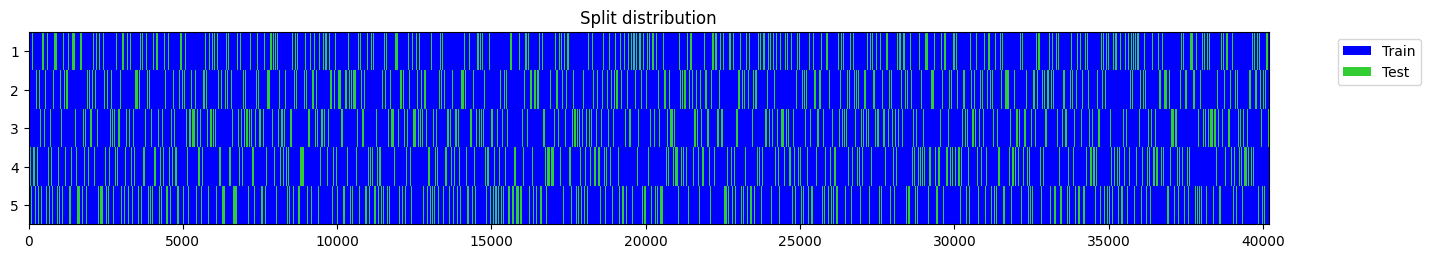

Fold: (1/5)
Setting up Pipeline: TSClassification -- {'vocab': None, 'sort': True}


Better model found at epoch 0 with f1_score value: 0.0.


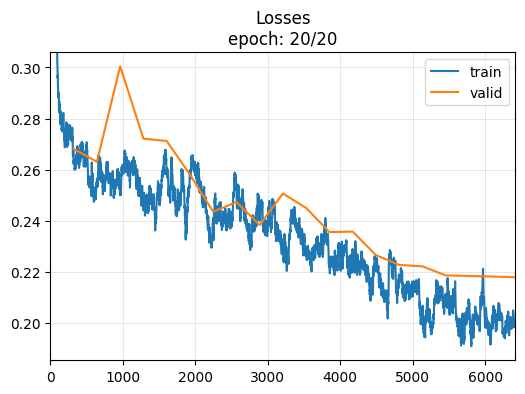

Better model found at epoch 1 with f1_score value: 0.002994011976047904.
Better model found at epoch 2 with f1_score value: 0.03773584905660377.
Better model found at epoch 5 with f1_score value: 0.04892086330935252.
Better model found at epoch 6 with f1_score value: 0.09944751381215469.
Better model found at epoch 10 with f1_score value: 0.16216216216216217.
Better model found at epoch 11 with f1_score value: 0.16599732262382866.
Better model found at epoch 12 with f1_score value: 0.2555831265508685.
Better model found at epoch 14 with f1_score value: 0.3007159904534606.
Better model found at epoch 16 with f1_score value: 0.3177570093457943.
Better model found at epoch 17 with f1_score value: 0.33751425313568983.
Better model found at epoch 18 with f1_score value: 0.35028248587570626.
Better model found at epoch 19 with f1_score value: 0.3518728717366629.


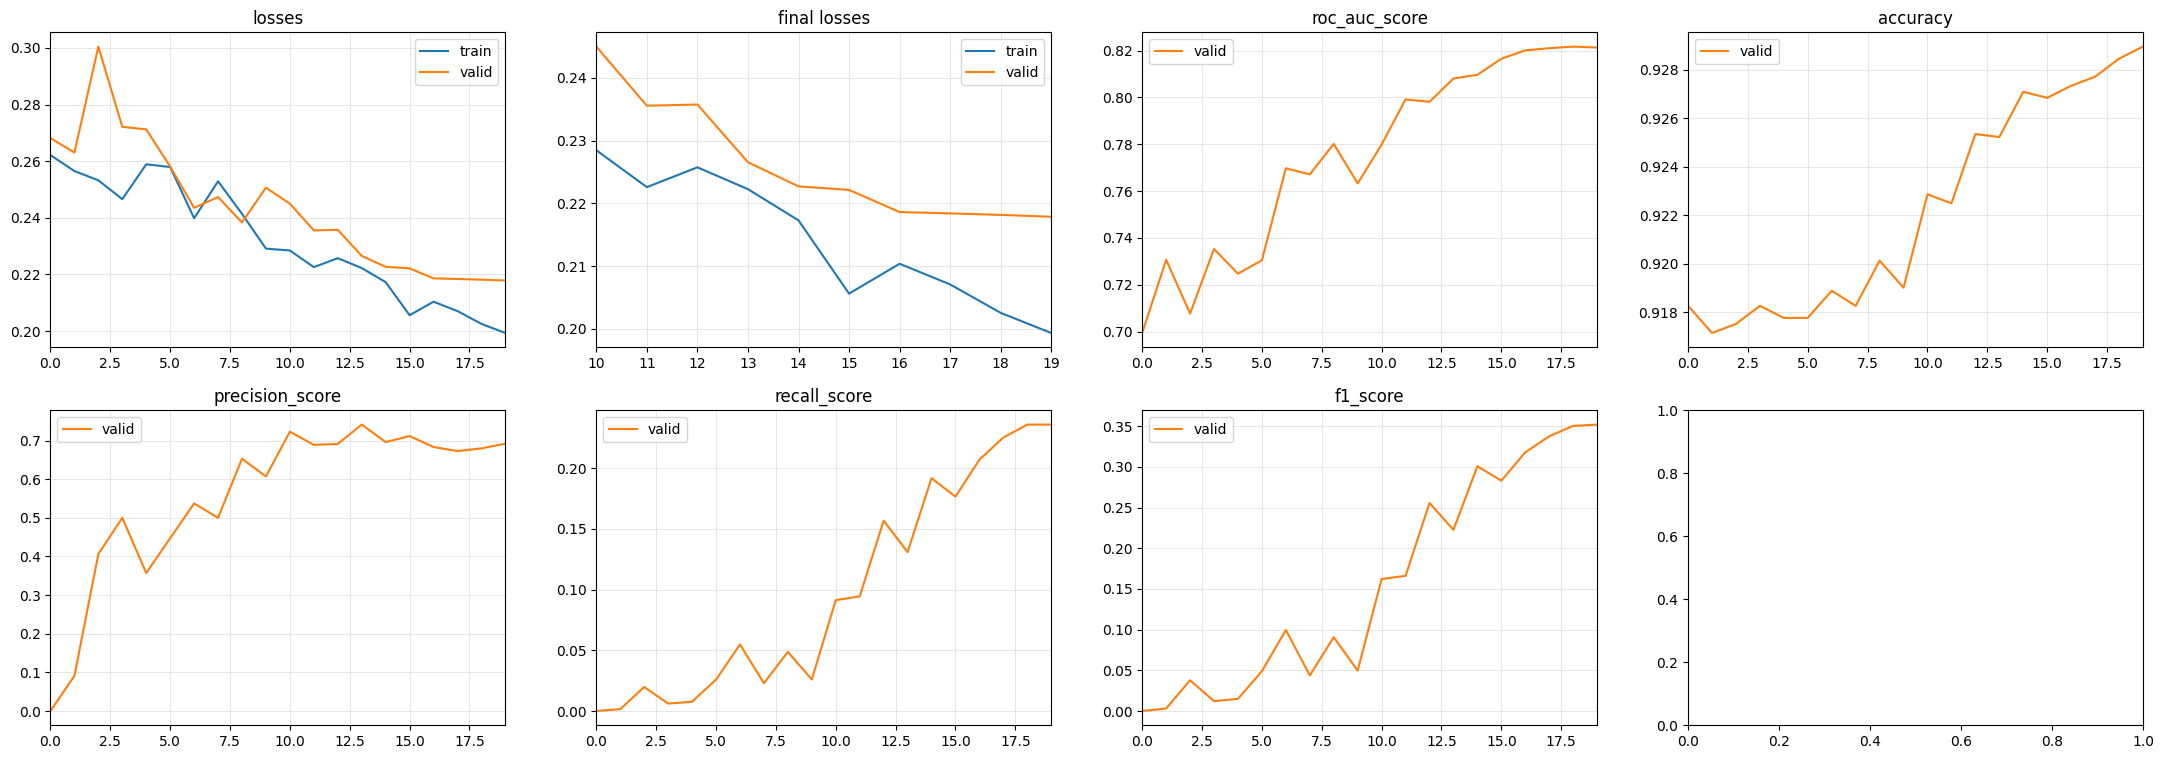


Elapsed time: 1483.700603723526
Fold: (2/5)
Setting up Pipeline: TSClassification -- {'vocab': None, 'sort': True}


Better model found at epoch 0 with f1_score value: 0.0.


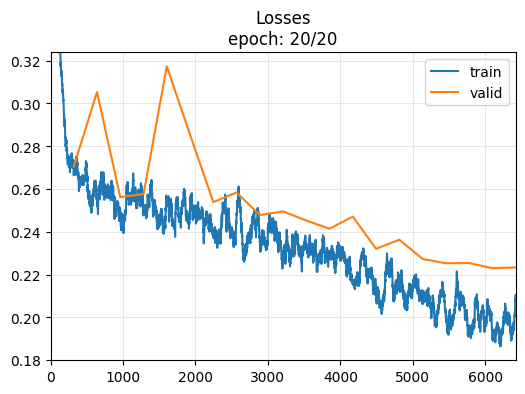

Better model found at epoch 1 with f1_score value: 0.0060698027314112285.
Better model found at epoch 2 with f1_score value: 0.027027027027027025.
Better model found at epoch 4 with f1_score value: 0.22346368715083798.
Better model found at epoch 5 with f1_score value: 0.2826086956521739.
Better model found at epoch 12 with f1_score value: 0.30303030303030304.
Better model found at epoch 14 with f1_score value: 0.31271091113610794.
Better model found at epoch 15 with f1_score value: 0.32073310423825885.


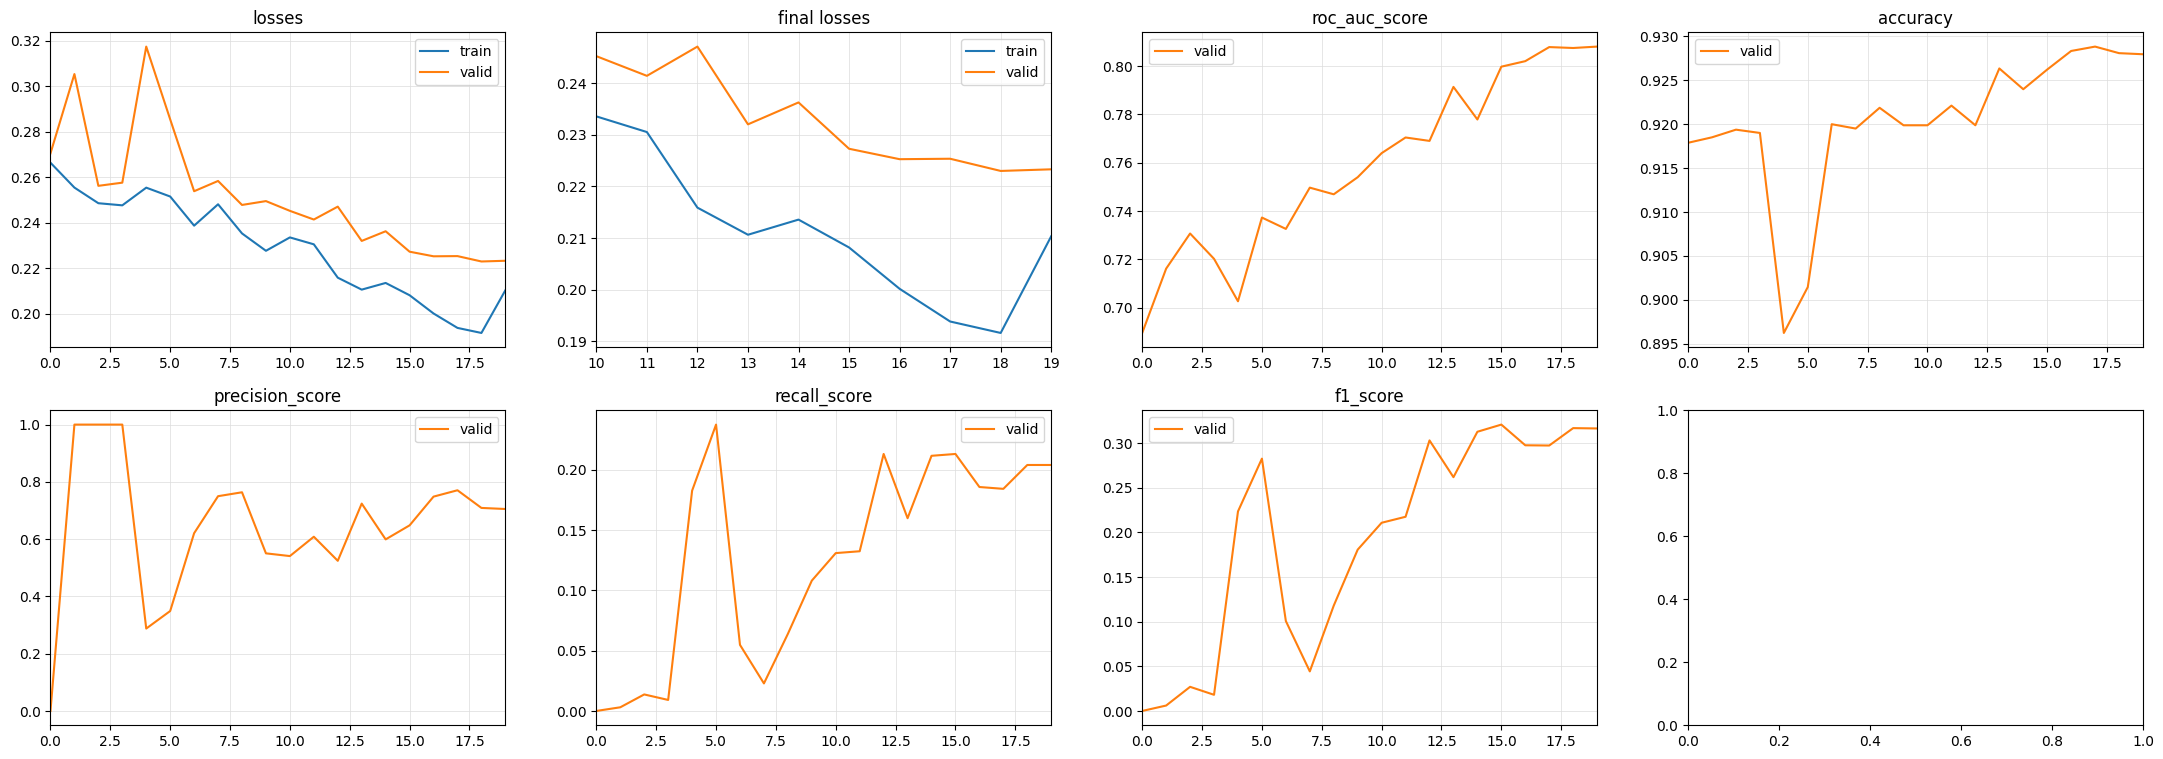


Elapsed time: 1485.9929699897766
Fold: (3/5)
Setting up Pipeline: TSClassification -- {'vocab': None, 'sort': True}


Better model found at epoch 0 with f1_score value: 0.0.


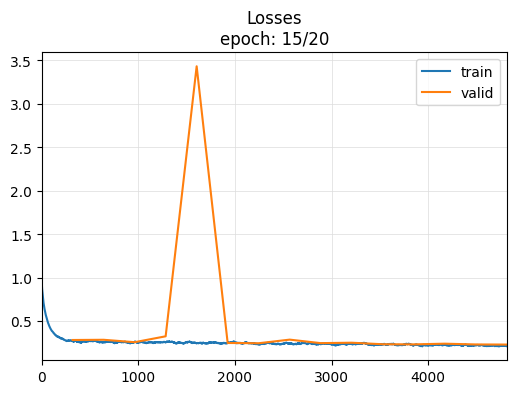

Better model found at epoch 1 with f1_score value: 0.00302571860816944.
Better model found at epoch 2 with f1_score value: 0.029895366218236172.
Better model found at epoch 3 with f1_score value: 0.1251101321585903.
Better model found at epoch 4 with f1_score value: 0.18430203676105314.
Better model found at epoch 7 with f1_score value: 0.29850746268656714.
Better model found at epoch 12 with f1_score value: 0.35470085470085466.


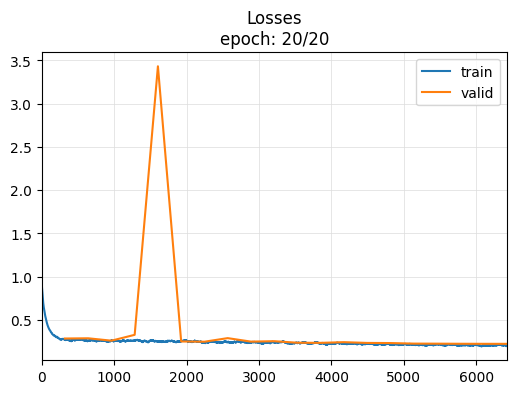

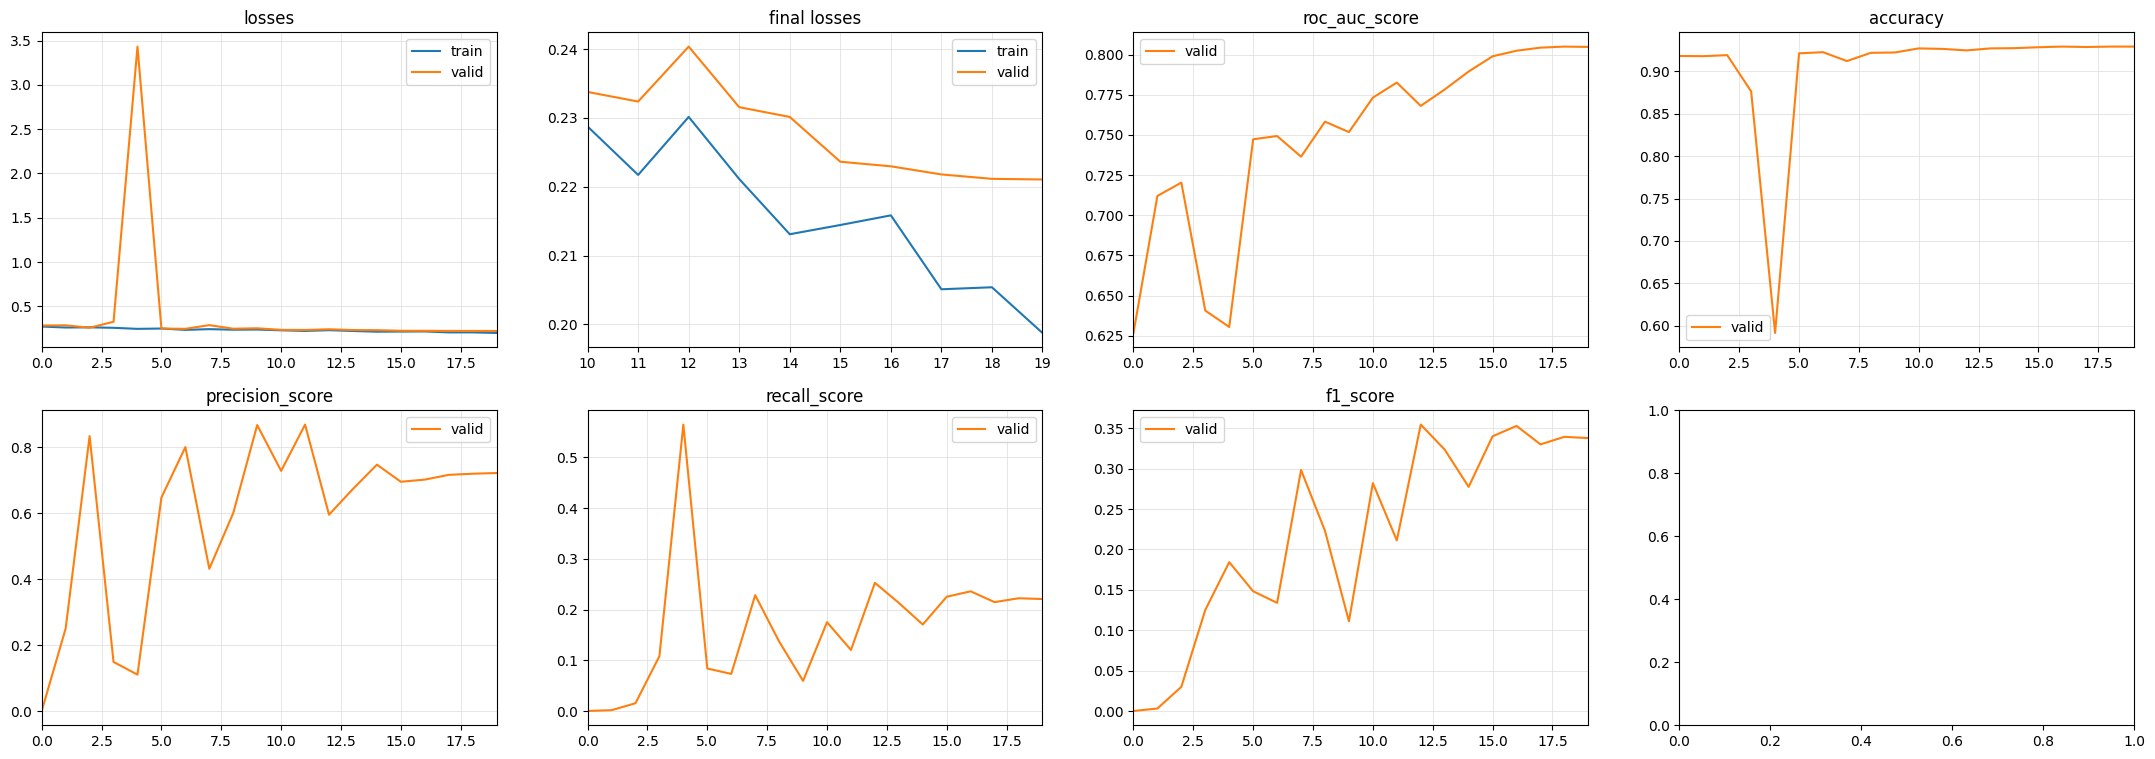


Elapsed time: 1483.2440395355225
Fold: (4/5)
Setting up Pipeline: TSClassification -- {'vocab': None, 'sort': True}


Better model found at epoch 0 with f1_score value: 0.0.


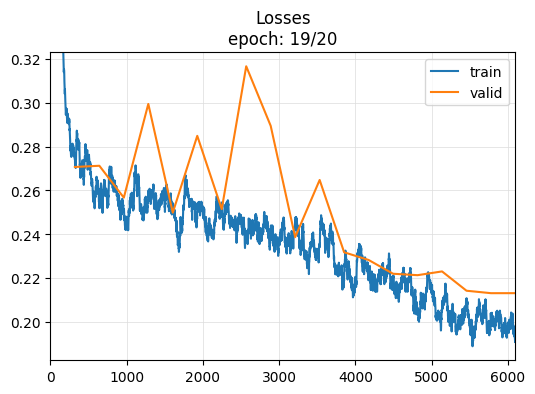

Better model found at epoch 1 with f1_score value: 0.0030395136778115497.
Better model found at epoch 2 with f1_score value: 0.014992503748125935.
Better model found at epoch 3 with f1_score value: 0.1839285714285714.
Better model found at epoch 5 with f1_score value: 0.2395939086294416.
Better model found at epoch 7 with f1_score value: 0.328042328042328.
Better model found at epoch 12 with f1_score value: 0.3322332233223322.
Better model found at epoch 16 with f1_score value: 0.33796296296296297.


In [ ]:
def train_and_evaluate_it(X, y, splits, bs, lr, epochs, fold):
  tfms  = [None, [TSClassification()]]
  dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True, verbose=True)
  dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs)

  model = InceptionTime(dls.vars, dls.c)
  SaveModelCallback = SaveModel(monitor='f1_score', fname='inceptiontime_v14_bestf1_Fold'+str(fold), verbose=True)
  learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=[ShowGraphCallback2(), SaveModelCallback])

  # model = InceptionTime(dls.vars, dls.c)
  # learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
  start = time.time()
  learn.fit_one_cycle(epochs, lr_max=lr)
  print('\nElapsed time:', time.time() - start)

splits = get_splits(y, n_splits=5, valid_size=.2, stratify=True, shuffle=True, check_splits=True)
for fold, s in enumerate(splits, 1):
  print(f"Fold: ({fold}/{len(splits)})")
  train_and_evaluate_it(X, y, s, bs, 1e-3, n_epochs, fold)

## Training

In [12]:
bs = 100
n_epochs = 20

In [19]:
tfms  = [None, [TSClassification()]]

dsets = TSDatasets(X, y, tfms=tfms, splits=splits, inplace=True, verbose=True)

# TSStandardize -> it standarize the data in the TSDatasets object during the data loading process
# Params removed:
#   - batch_tfms=TSStandardize()
dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs)

Setting up Pipeline: TSClassification -- {'vocab': None, 'sort': True}


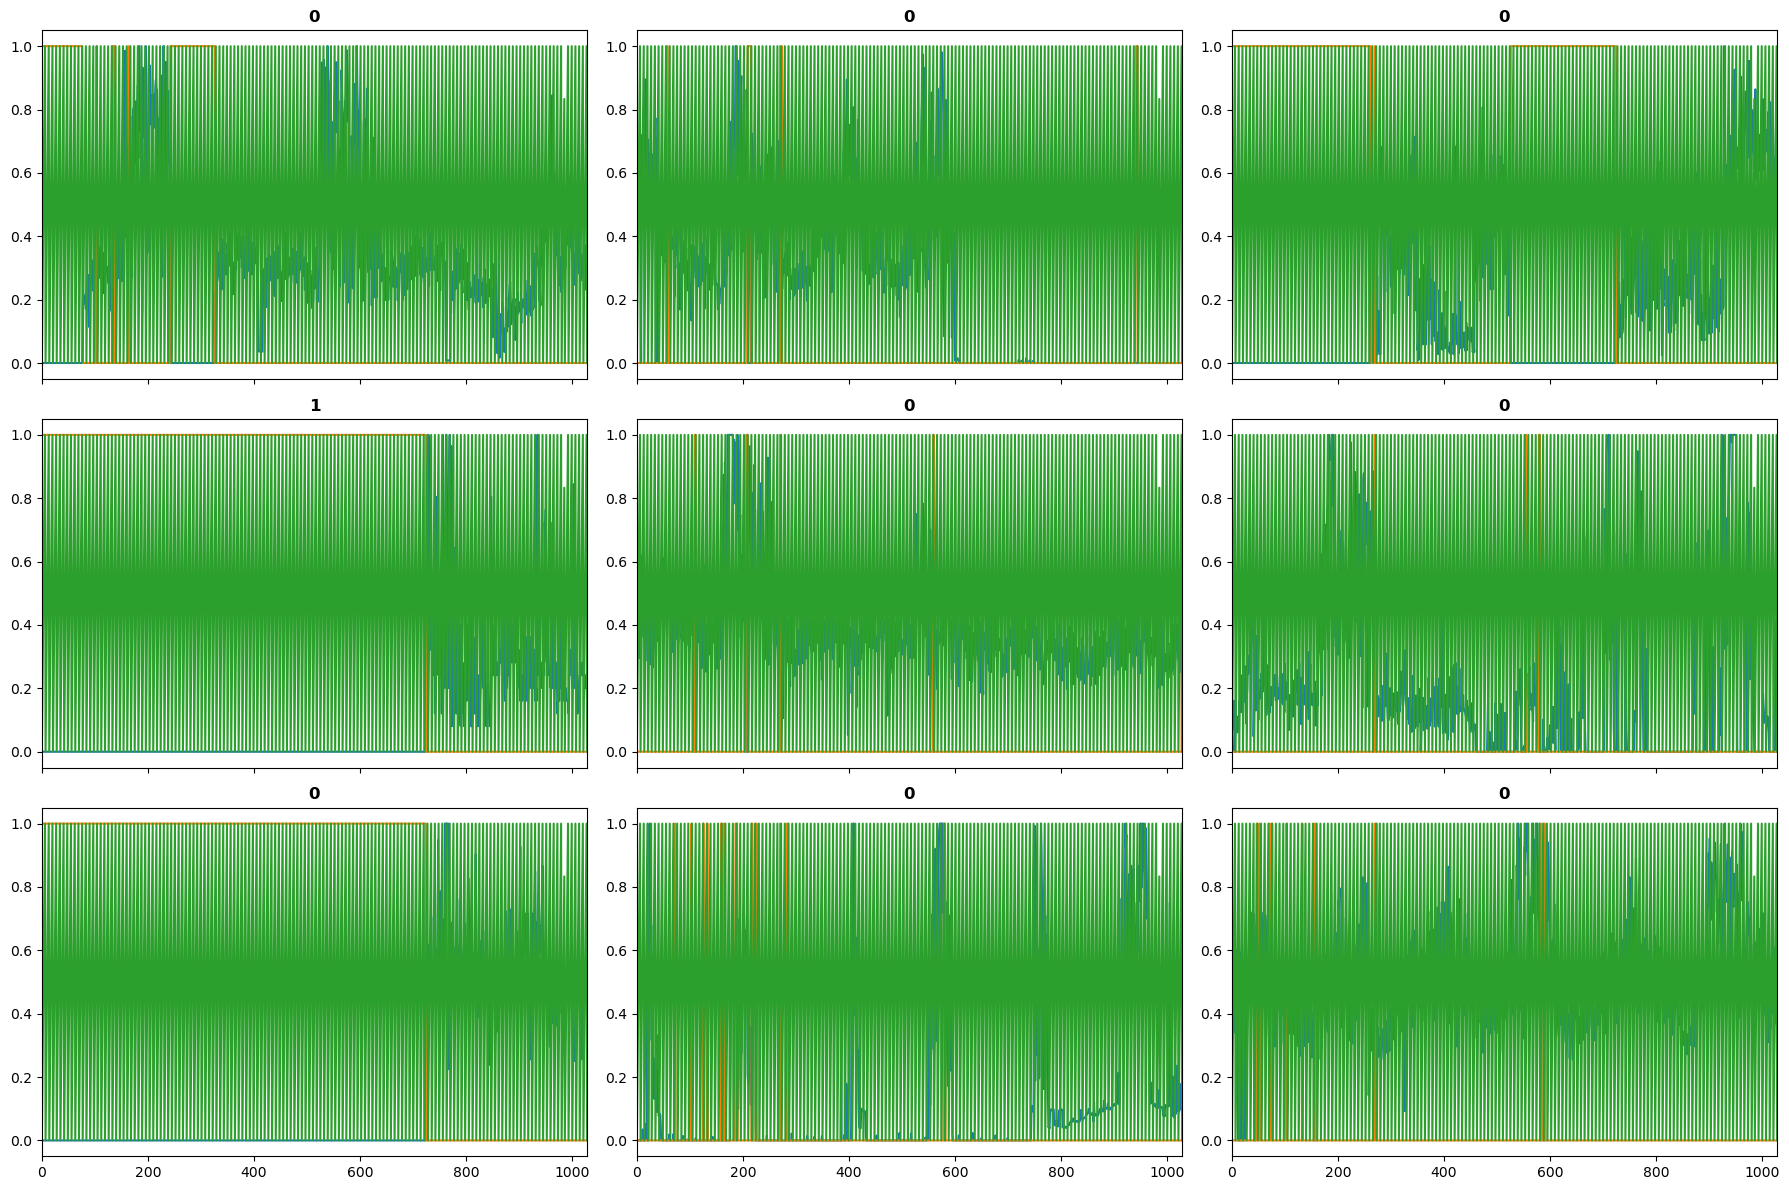

In [20]:
dls.show_batch()

In [21]:
b = dls.one_batch()
b[0].shape, b[1].shape

(torch.Size([100, 3, 1029]), torch.Size([100]))

### Inception time

In [22]:
dls.vars

3

In [ ]:
# model = InceptionTimePlus(
#     dls.vars,
#     dls.c,
#     seq_len=1029,
#     ks=64,  # Increased filter length
#     depth=8,  # Increased depth
#     nf=64  # Increased number of filters
# )

SuggestedLRs(valley=0.0014454397605732083)

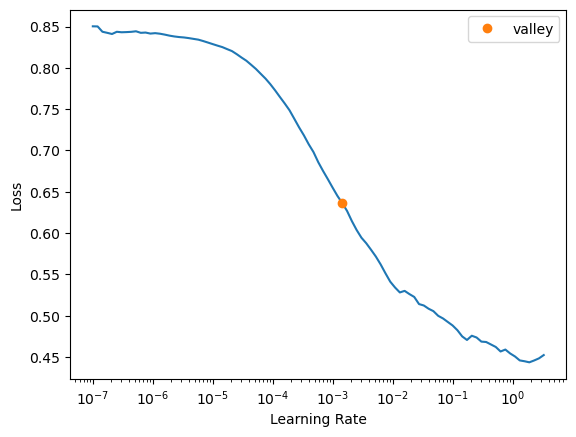

In [24]:
model = InceptionTime(dls.vars, dls.c) #ks=30
SaveModelCallback = SaveModel(monitor='f1_score', fname='InceptionTime_v20_bestf1', at_end=False)
learn = Learner(dls, model, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=[ShowGraphCallback2(), SaveModelCallback]) #SaveModelCallback
learn.lr_find()

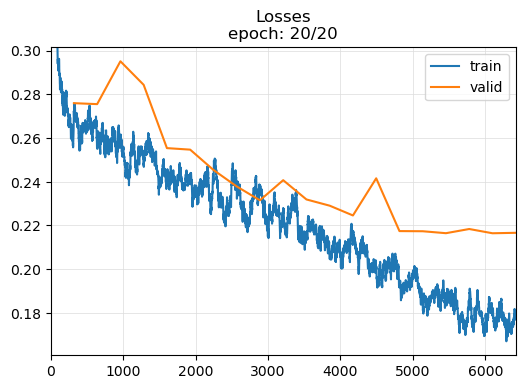

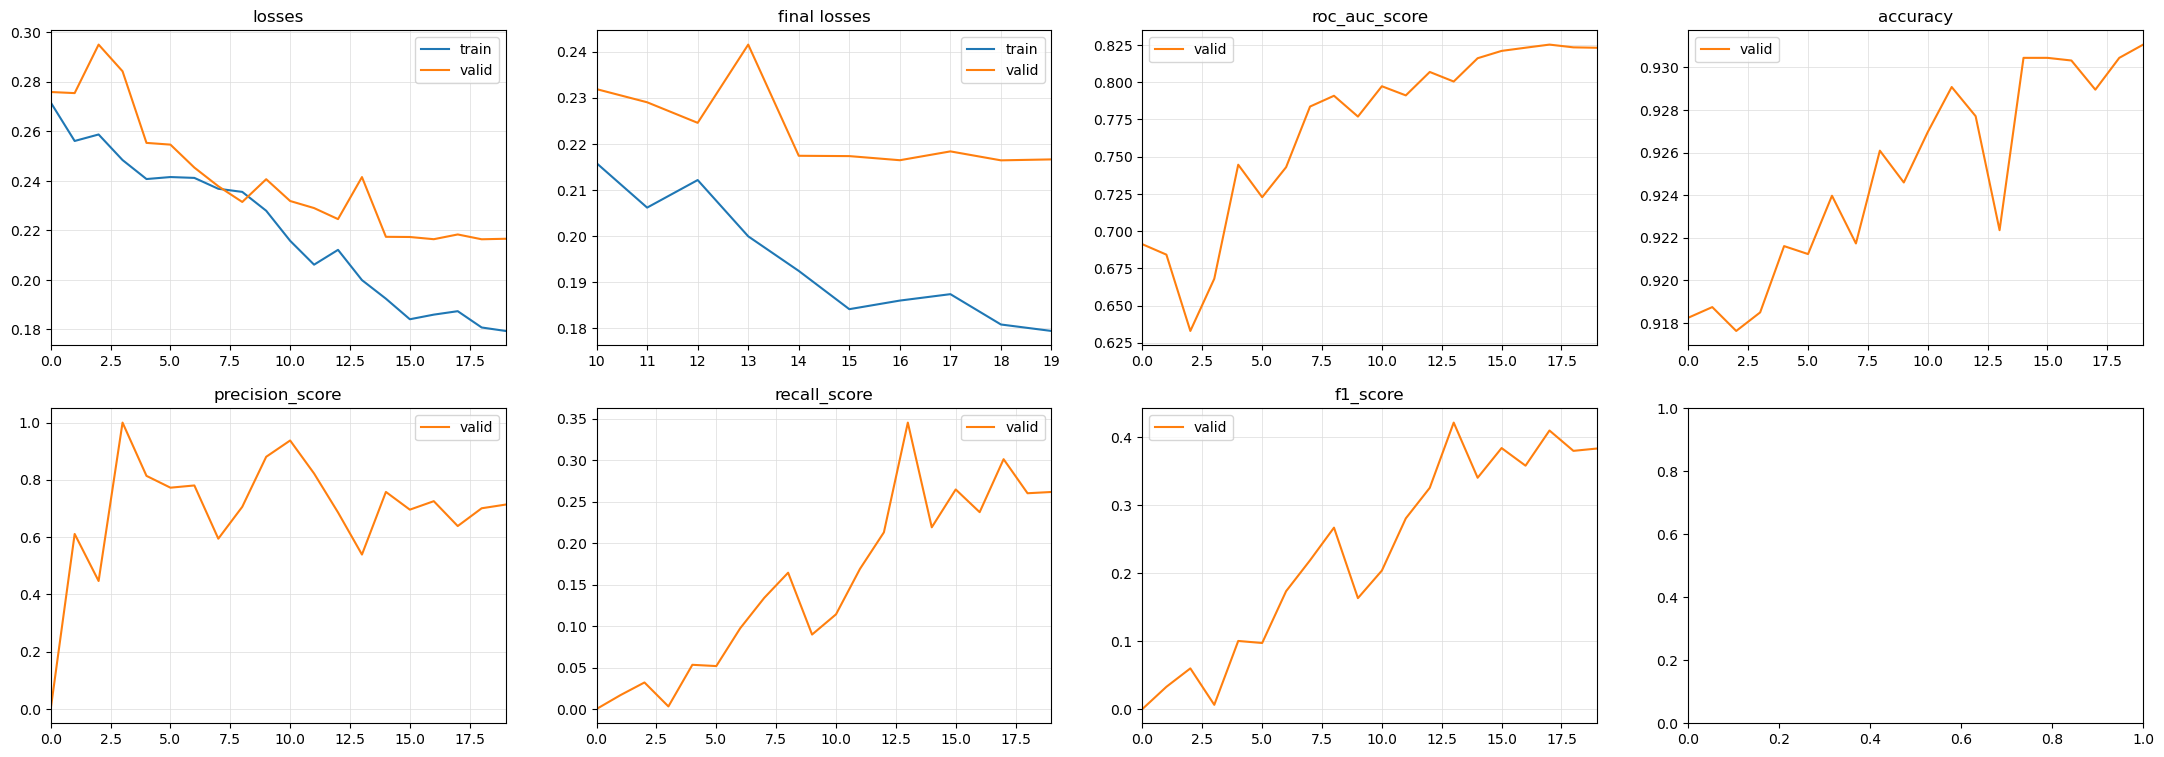


Elapsed time: 1199.625081062317


In [56]:
start = time.time()
learn.fit_one_cycle(20, lr_max=1e-3)
print('\nElapsed time:', time.time() - start)

In [25]:
learn.load('InceptionTime_v20_bestf1')

In [32]:
learn.export("InceptionTime_v20_bestf1_learner.pkl")

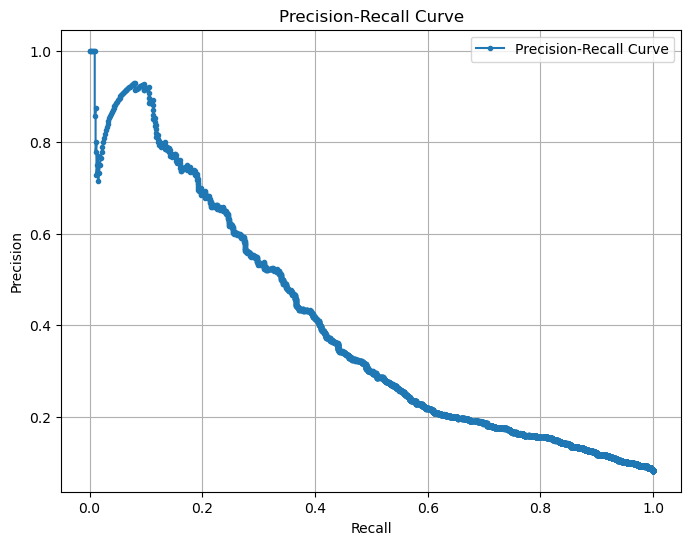

In [55]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Obtener predicciones y probabilidades en el conjunto de validación
preds, targs = learn.get_preds()

# Obtener las curvas de precisión-recall
precision, recall, _ = precision_recall_curve(targs, preds[:, 1])

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


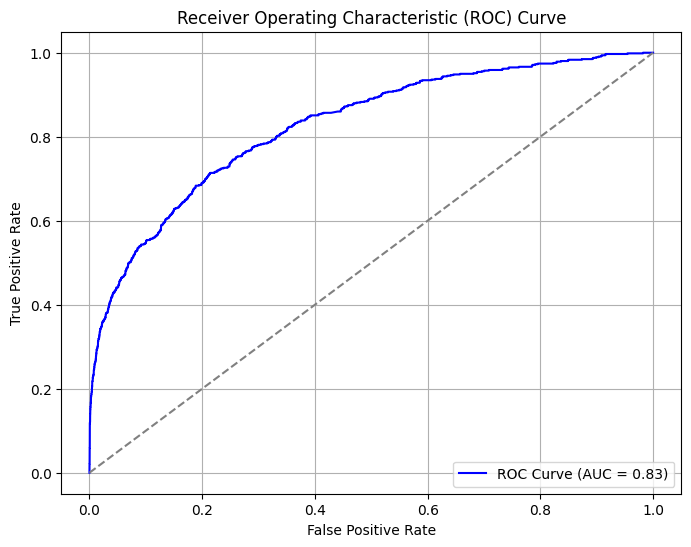

In [ ]:
# Obtener las curvas ROC
fpr, tpr, _ = roc_curve(targs, preds[:, 1])
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Mejor umbral: 0.30303030303030304
Mejor F1 Score: 0.4488817891373802


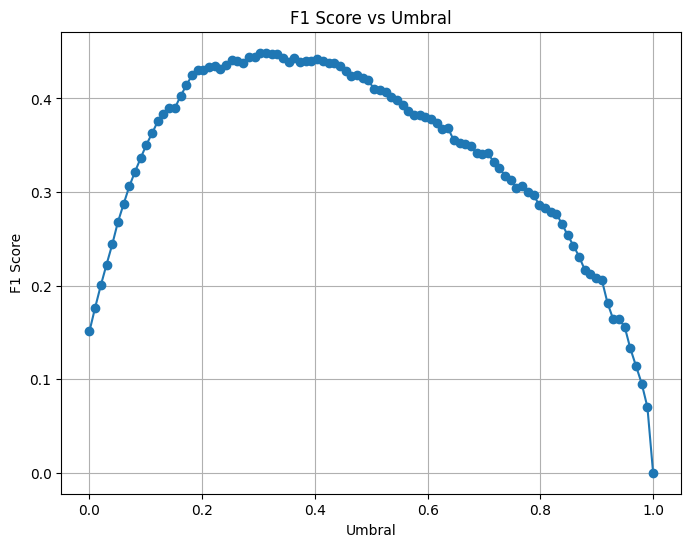

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import torch

# Obtener las probabilidades predichas en el conjunto de validación
preds, targs = learn.get_preds()
pred_probs = preds[:, 1].cpu().numpy()  # Convertir a numpy array
true_labels = targs.cpu().numpy()  # Convertir a numpy array

# Definir una gama de umbrales
thresholds = np.linspace(0, 1, 100)
f1_scores = []

# Calcular F1 Score para cada umbral
for threshold in thresholds:
    preds_binary = (pred_probs > threshold).astype(int)  # Convertir a binario
    f1 = f1_score(true_labels, preds_binary)
    f1_scores.append(f1)

# Encontrar el umbral que produce el mejor F1 Score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = max(f1_scores)

print(f"Mejor umbral: {best_threshold}")
print(f"Mejor F1 Score: {best_f1_score}")

# Opcional: Graficar el F1 Score en función del umbral
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Umbral')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Umbral')
plt.grid()
plt.show()


In [ ]:
val_metrics = learn.validate()
print(f"Métricas en validación: {val_metrics}")

IndexError: Exception occured in `SaveModel` when calling event `after_epoch`:
	list index out of range

### LSTM

SuggestedLRs(valley=0.002511886414140463)

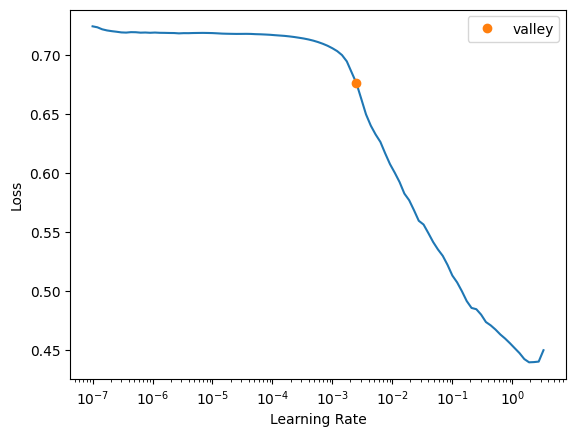

In [ ]:
model_lstm = LSTM(dls.vars, dls.c)
learn_lstm = Learner(dls, model_lstm, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
learn_lstm.lr_find()

In [ ]:
10 ** -3

0.001

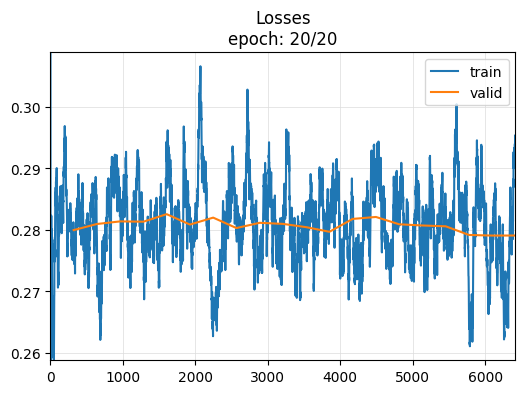

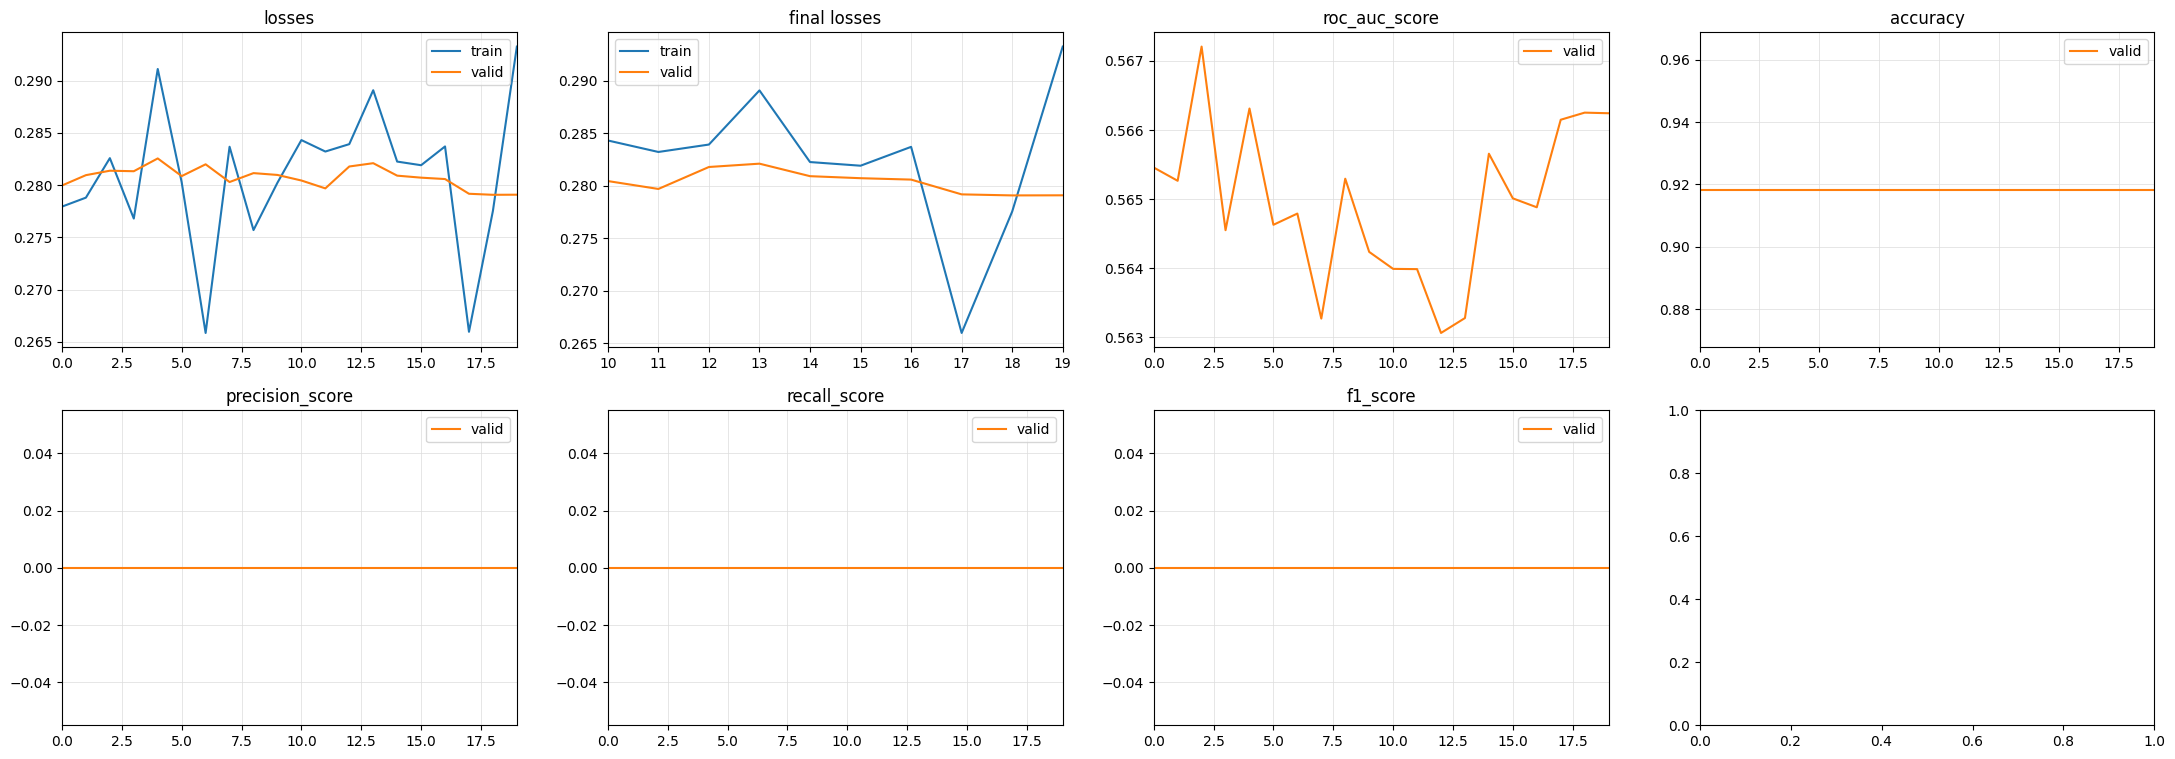


Elapsed time: 245.9135549068451


In [ ]:
start = time.time()
learn_lstm.fit_one_cycle(n_epochs, lr_max=1e-3)
print('\nElapsed time:', time.time() - start)
# learn.fit_one_cycle(1, 3e-3)

### RNN

SuggestedLRs(valley=0.0006918309954926372)

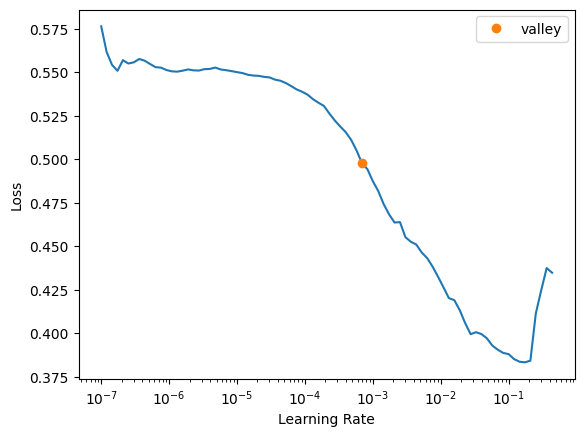

In [ ]:
model_rnn = RNN(dls.vars, dls.c)
learn_rnn = Learner(dls, model_rnn, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
learn_rnn.lr_find()

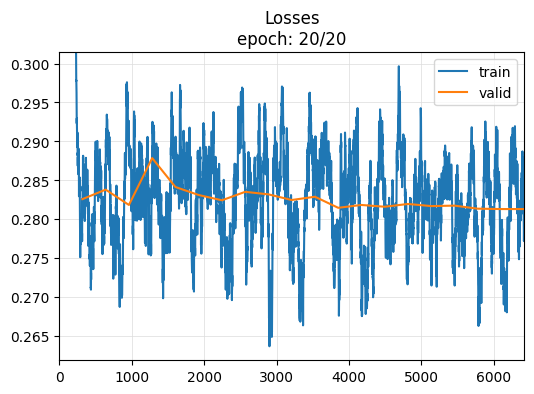

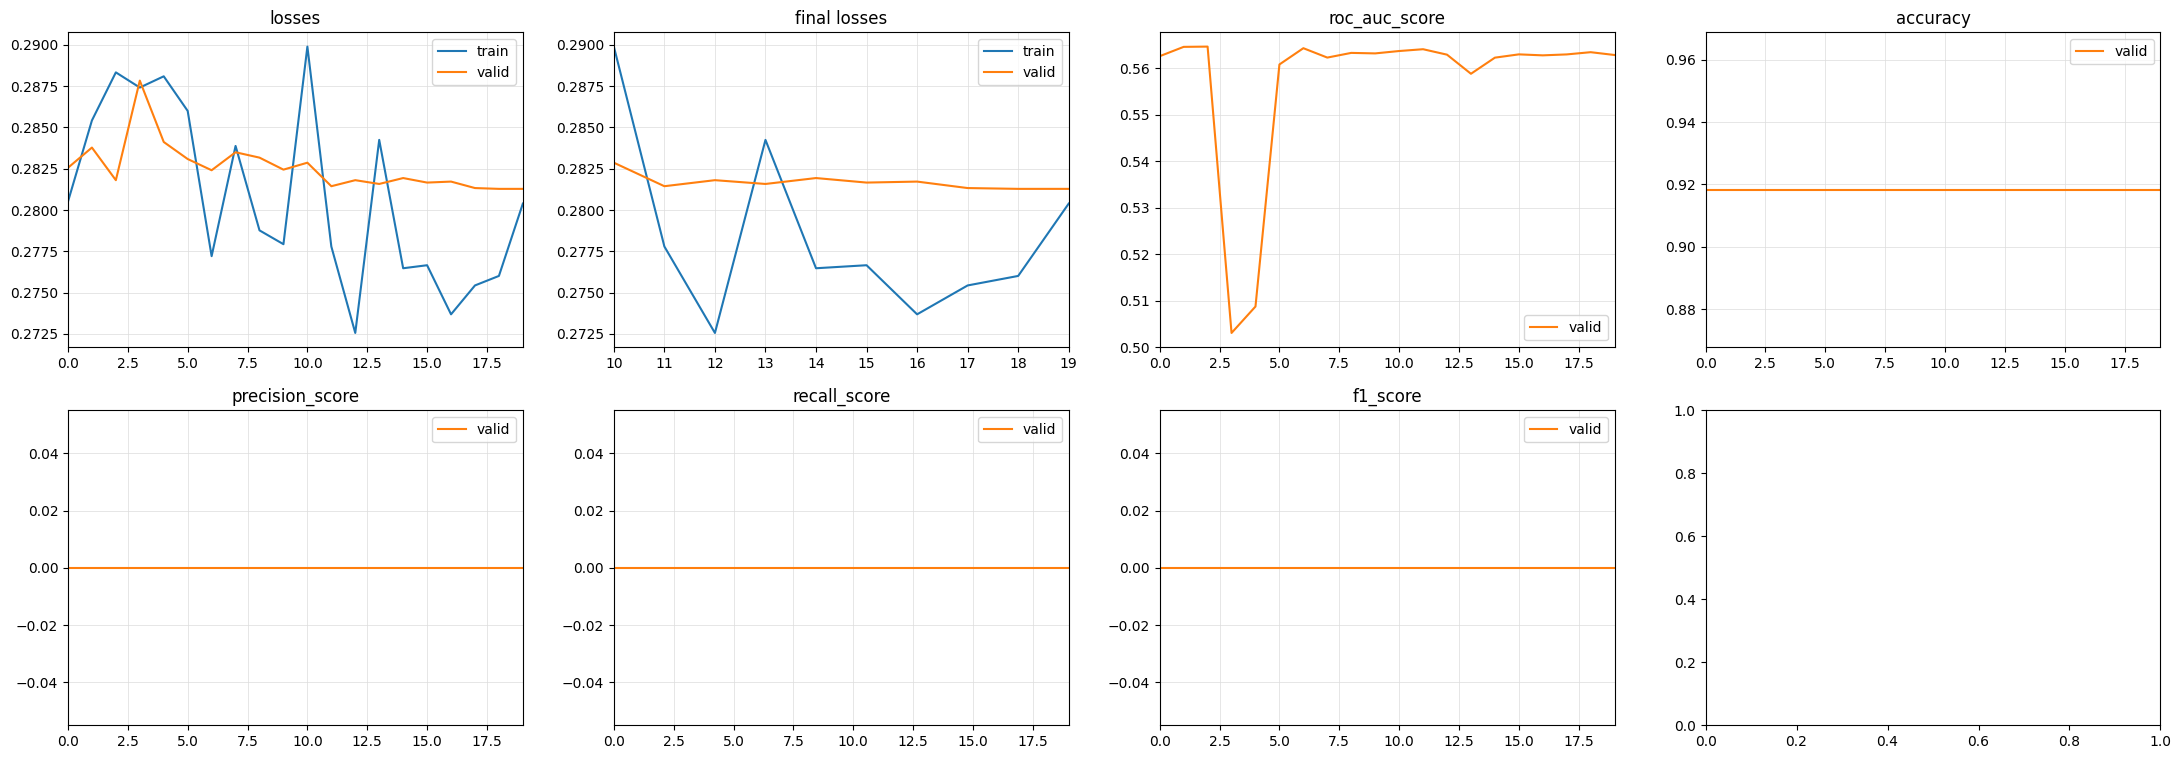


Elapsed time: 87.25469899177551


In [ ]:
start = time.time()
learn_rnn.fit_one_cycle(n_epochs, lr_max=0.0006918309954926372)
print('\nElapsed time:', time.time() - start)
# learn.fit_one_cycle(1, 3e-3)

### GRU

SuggestedLRs(valley=0.0002290867705596611)

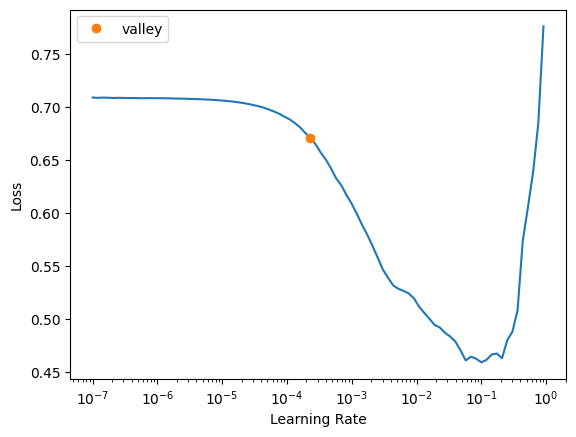

In [ ]:
model_gru = RNN(dls.vars, dls.c)
learn_gru = Learner(dls, model_gru, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
learn_gru.lr_find()

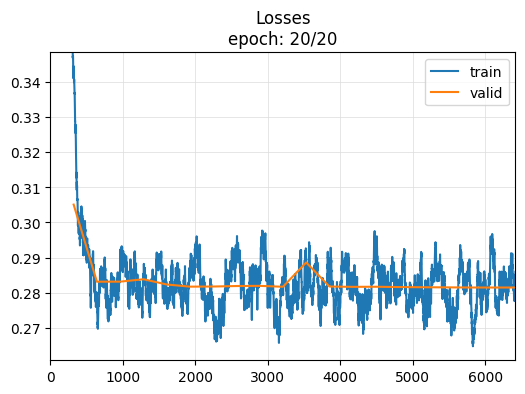

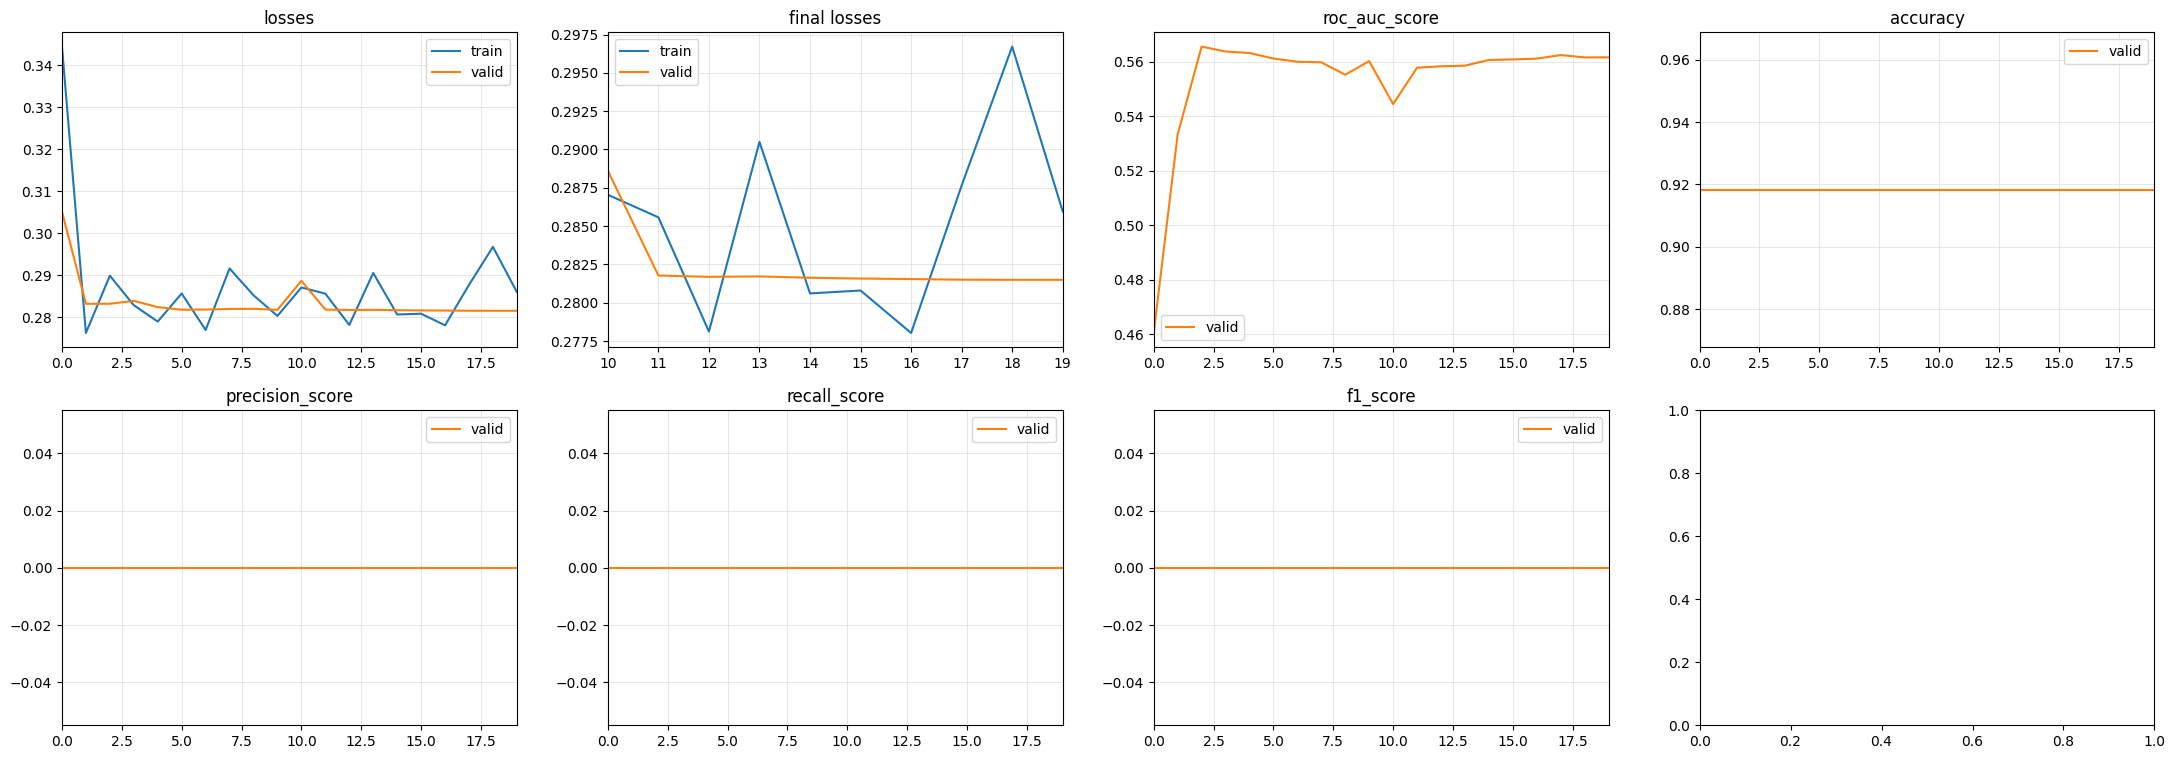


Elapsed time: 87.54049777984619


In [ ]:
start = time.time()
learn_gru.fit_one_cycle(n_epochs, lr_max=0.000229)
print('\nElapsed time:', time.time() - start)
# learn.fit_one_cycle(1, 3e-3)

### GRU Attention


In [ ]:
# Values are based in the configuration of Anomaly Transformer
arch_config = {
        'n_layers':3,  # number of encoder layers
        'n_heads':8,  # number of heads
        'd_model':512,  # dimension of model
        'd_ff':512,  # dimension of fully connected network (fcn)
        # attn_dropout:0.,
        'dropout':0.2,  # dropout applied to all linear layers in the encoder
        'patch_len':16,  # patch_len
        'stride':8,  # stride
        'c_in':dls.vars,
        'c_out':dls.c,
        'seq_len':1029,
        'kernel_size':3,
        # activation:"gelu" -> This is set by default
}

In [ ]:
X.shape

(40185, 3, 1029)

In [ ]:
model_grua = LSTMAttention(
    # rnn_layers=3,  # number of encoder layers
    # n_heads=8,  # number of heads
    # d_model=512,  # dimension of model
    # d_ff=512,  # dimension of fully connected network (fcn)
    # attn_dropout=0.,
    # dropout=0.2,  # dropout applied to all linear layers in the encoder
    # patch_len=16,  # patch_len
    # stride=8,  # stride
    c_in=dls.vars,
    c_out=dls.c,
    seq_len=1029,
    # kernel_size=3,
    # activation="gelu" -> This is set by default
)
learn_grua = Learner(dls, model_grua, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
# learn_grua.lr_find()

In [ ]:
start = time.time()
learn_grua.fit_one_cycle(n_epochs, lr_max=1e-3)
print('\nElapsed time:', time.time() - start)
# learn.fit_one_cycle(1, 3e-3)

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.04 GiB. GPU 0 has a total capacity of 14.75 GiB of which 1.61 GiB is free. Process 13166 has 13.13 GiB memory in use. Of the allocated memory 10.07 GiB is allocated by PyTorch, and 2.93 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### LSTM, RNN and GRU with Attention mechanism

In [ ]:
bs = 100
c_in = 1  # aka channels, features, variables, dimensions
c_out = 2
seq_len = 1029

In [ ]:
# Settings
hidden_size = 128
rnn_layers=1
bias=True
rnn_dropout=0
bidirectional=False
encoder_layers=3
n_heads = 16
d_k = d_v = None # if None --> d_model // n_heads
d_ff = 256
encoder_dropout = 0.1
act = "gelu"
fc_dropout = 0.1
kwargs = {}

In [ ]:
model_rnna = RNNAttention(c_in, c_out, seq_len, hidden_size=hidden_size, rnn_layers=rnn_layers, bias=bias, rnn_dropout=rnn_dropout, bidirectional=bidirectional,
            encoder_layers=encoder_layers, n_heads=n_heads,
            d_k=d_k, d_v=d_v, d_ff=d_ff, encoder_dropout=encoder_dropout, act=act,
            fc_dropout=fc_dropout, **kwargs)

In [ ]:
learn_gru = Learner(dls, model_rnna, metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()], cbs=ShowGraphCallback2())
learn_gru.lr_find()

OutOfMemoryError: CUDA out of memory. Tried to allocate 6.31 GiB. GPU 0 has a total capacity of 14.75 GiB of which 1.31 GiB is free. Process 8007 has 13.43 GiB memory in use. Of the allocated memory 7.60 GiB is allocated by PyTorch, and 5.70 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

# Save TSAI Data: Model, learner, dls

In [57]:
learn.export("inceptiontime_learner.pkl",pickle_module=pickle)

In [10]:
from tsai.inference import load_learner

learn = load_learner("inceptiontime_learner.pkl")

In [58]:
# To save all
learn.save_all(path='inception_time', dls_fname='InceptionTime_dls', model_fname='InceptionTime_model', learner_fname='InceptionTime_learner')

In [ ]:
# Load all information
learn = load_learner_all(path='export', dls_fname='dls', model_fname='model', learner_fname='learner')
dls = learn.dls

# Predicting

In [27]:
valid_probas, valid_targets, valid_preds = learn.get_preds(dl=dls.valid, with_decoded=True)
valid_probas, valid_targets, valid_preds

(tensor([[0.9104, 0.0896],
         [0.7920, 0.2080],
         [0.9775, 0.0225],
         ...,
         [0.8449, 0.1551],
         [0.9745, 0.0255],
         [0.8810, 0.1190]]),
 tensor([0, 0, 0,  ..., 0, 0, 0]),
 tensor([0, 0, 0,  ..., 0, 0, 0]))

# Predicting a single instance

In [11]:
single_data = X[splits[1][13]]
single_label = y[splits[1][13]]

In [12]:
# Records in the validation dataset with the highest probability of being fraudulent
np.where(y[splits[1]] == 1)

(array([  13,   33,   35,   40,   55,   75,  108,  116,  118,  189,  228,
         258,  288,  297,  299,  300,  305,  334,  338,  339,  345,  349,
         356,  377,  380,  389,  396,  413,  414,  419,  436,  453,  460,
         461,  470,  494,  514,  515,  531,  559,  572,  592,  608,  611,
         613,  615,  642,  645,  666,  677,  688,  692,  699,  709,  715,
         727,  775,  791,  819,  841,  853,  855,  860,  891,  911,  925,
         935,  947,  951,  956,  962,  966,  975,  976,  981,  993, 1000,
        1008, 1018, 1019, 1020, 1048, 1061, 1093, 1110, 1135, 1143, 1151,
        1182, 1202, 1218, 1224, 1227, 1235, 1245, 1258, 1261, 1265, 1266,
        1279, 1321, 1341, 1352, 1353, 1366, 1374, 1390, 1393, 1394, 1428,
        1437, 1438, 1448, 1465, 1467, 1496, 1506, 1512, 1517, 1542, 1551,
        1558, 1564, 1576, 1577, 1586, 1589, 1595, 1601, 1609, 1614, 1645,
        1657, 1659, 1660, 1703, 1708, 1720, 1722, 1733, 1735, 1737, 1743,
        1749, 1796, 1799, 1833, 1852, 

In [13]:
X[splits[1][12:14]].shape

(2, 3, 1029)

In [14]:
X_expanded = np.expand_dims(X[splits[1][12:13]], axis=0)
X_expanded.shape

y_expanded = np.expand_dims(y[splits[1][13]], axis=0)
y_expanded.shape

(1,)

In [ ]:
X[splits[1][12:14]]

In [75]:
y[splits[1][12:14]]

array([0, 1], dtype=int64)

In [76]:
from fastai.metrics import accuracy  # or another suitable metric
learn.metrics = [accuracy]  # Replace ROC AUC with accuracy

In [15]:
probas, target, preds = learn.get_X_preds(X[splits[1]], y[splits[1]])

In [47]:
y[splits[1]][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [48]:
splits[1]

(#8037) [22566,14818,18371,34395,11852,39941,26934,5099,28773,27772...]

In [39]:
# 40,   55,   75,  108,  116,  118,  189,  228
idx = 228
y[splits[1][idx]], probas[splits[1][idx]], target[splits[1][idx]], preds[splits[1][idx]] 

(1, tensor([0.9662, 0.0338]), tensor(0), '0')

In [46]:
1 in preds

False

In [52]:
tfms_single  = [None, [TSClassification()]]

dsets_single = TSDatasets(single_data, single_label, tfms=tfms_single)

metadataset = TSMetaDataset(dsets_single)
dl_single = TSDataLoader(metadataset)

# TSStandardize -> it standarize the data in the TSDatasets object during the data loading process
# Params removed:
#   - batch_tfms=TSStandardize()
# dls = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs)

IndexError: invalid index to scalar variable.

## Metrics

In [ ]:
(valid_targets == valid_preds).float().mean()

tensor(0.9201)

In [ ]:
print(f'accuracy: {skm.accuracy_score(valid_targets, valid_preds):10.6f}')

accuracy:   0.920109


## Visualize results

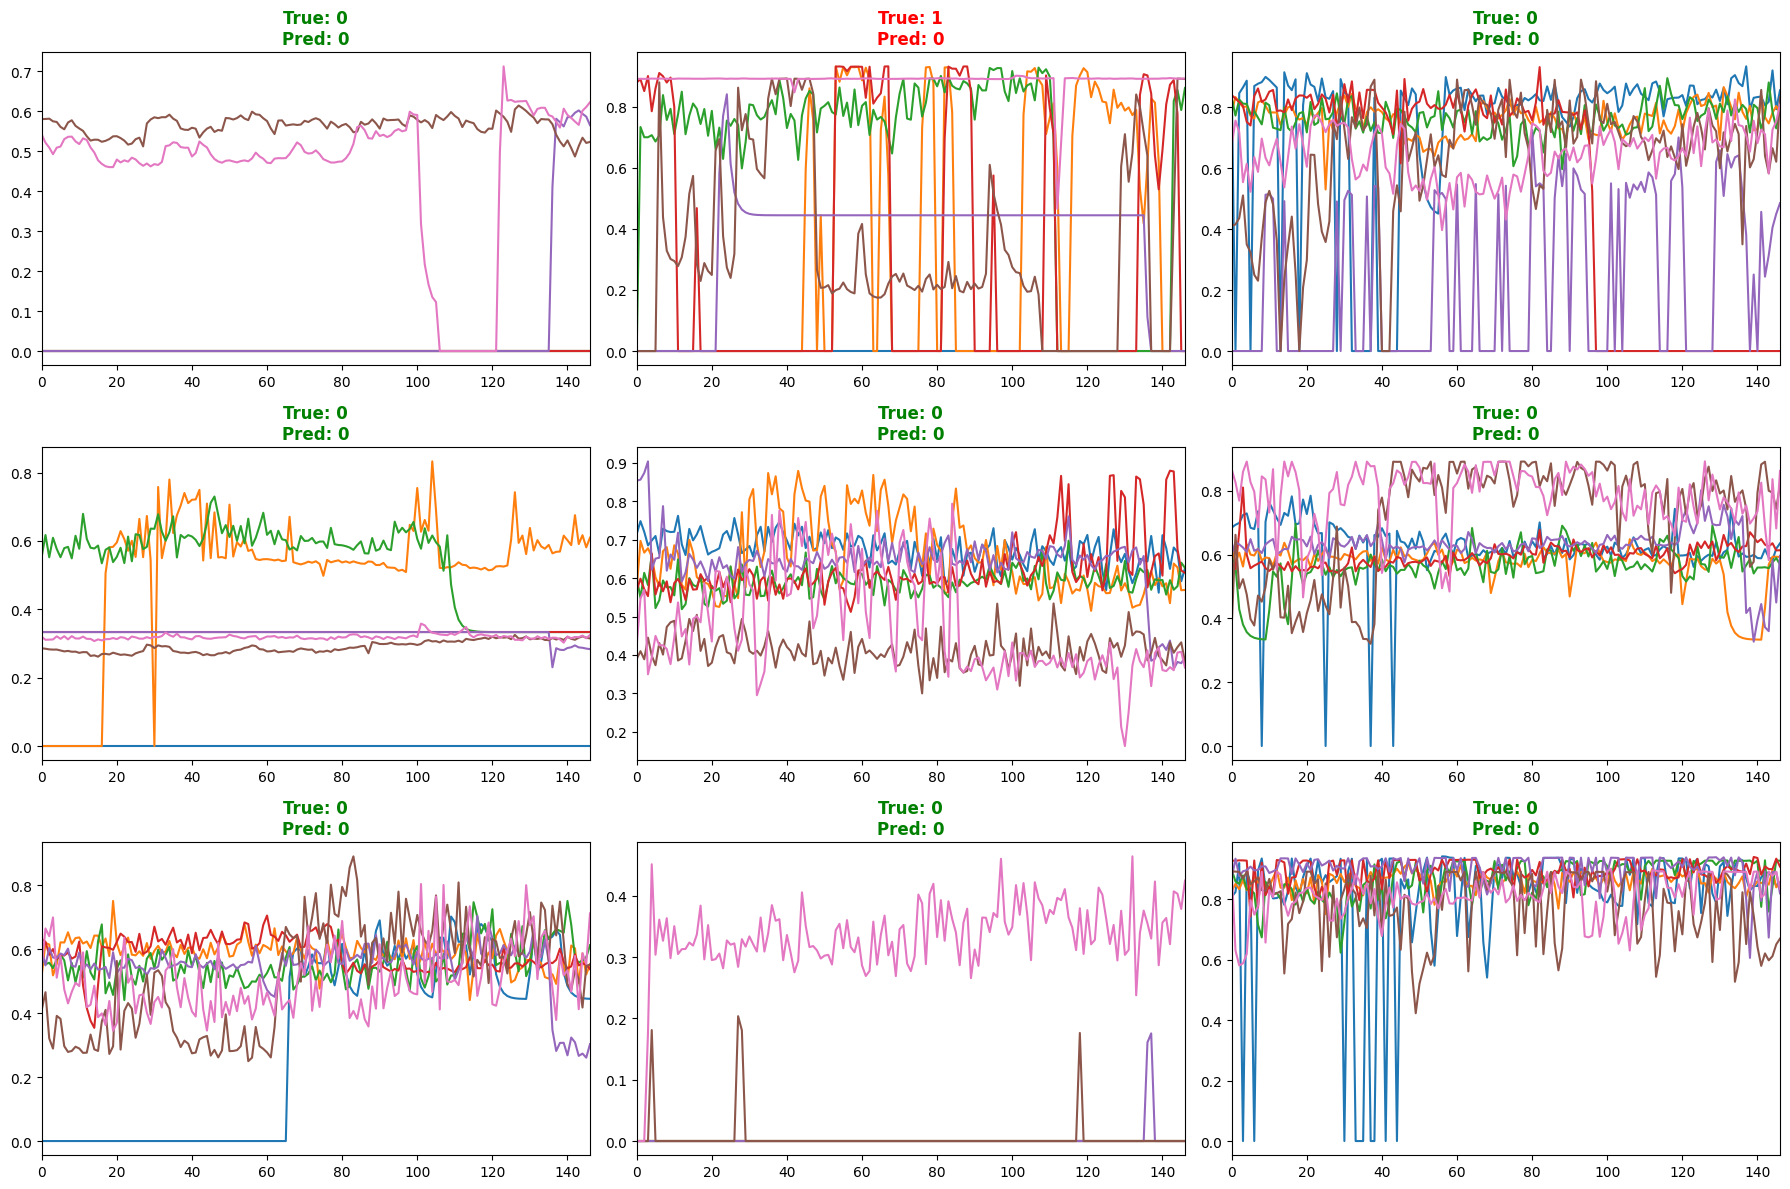

In [ ]:
learn_tst.show_results()

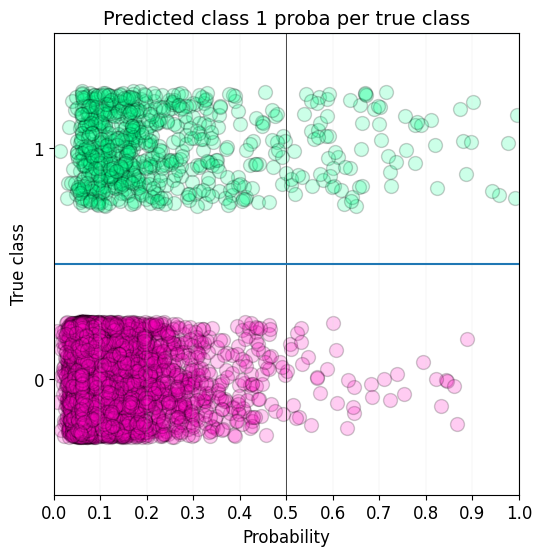

In [ ]:
learn_tst.show_probas()

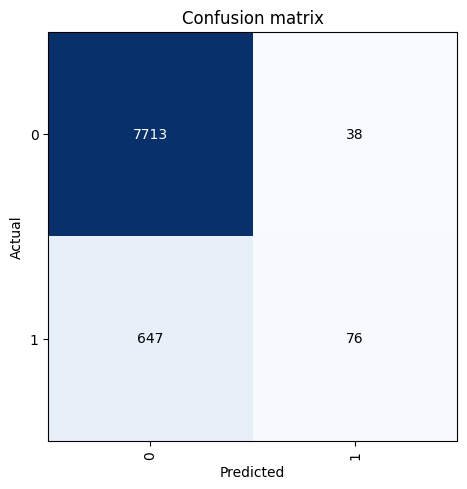

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_tst)
interp.plot_confusion_matrix()

## Benchmarking

In [ ]:
# Values are based in the configuration of Anomaly Transformer
arch_config=dict(
        n_layers=3,  # number of encoder layers
        n_heads=8,  # number of heads
        d_model=512,  # dimension of model
        d_ff=512,  # dimension of fully connected network (fcn)
        # attn_dropout=0.,
        dropout=0.2,  # dropout applied to all linear layers in the encoder
        patch_len=16,  # patch_len
        stride=8,  # stride
        c_in=7,
        c_out=1,
        seq_len=147,
        kernel_size=3,
        # activation="gelu" -> This is set by default
)

arch_config_inception_time = dict(
    c_in=7,
    c_out=1,
    seq_len=147
)

# (xresnet1d34, {}),
archs = [
        #   (FCN, {}),(ResNet, {}),  (ResCNN, {}),
        #  (LSTM, {'n_layers':1, 'bidirectional': False}),
        #  (LSTM, {'n_layers':2, 'bidirectional': False}), (LSTM, {'n_layers':3, 'bidirectional': False}),
        #  (LSTM, {'n_layers':1, 'bidirectional': True}), (LSTM, {'n_layers':2, 'bidirectional': True}), (LSTM, {'n_layers':3, 'bidirectional': True}),
        #  (LSTM_FCN, {}), (LSTM_FCN, {'shuffle': False}),
        # (MLP,arch_config),
        # (OmniScaleCNN, {}),
        #  (InceptionTime, arch_config_inception_time),(XceptionTime, arch_config_inception_time),
          (TST, {}),
          #  (TSTPlus, arch_config),
        # (RNNAttention,{}),  (LSTMAttention, {}),
        #  (GRUAttention, arch_config)
        ]

In [ ]:
results = pd.DataFrame(columns=['arch', 'hyperparams', 'total params', 'train loss', 'valid loss', 'roc_auc_score', 'accuracy', 'precision_score', 'recall_score', 'f1_score', 'time'])
for i, (arch, k) in enumerate(archs):
    model = create_model(arch, dls=dls, **k)
    print(model.__class__.__name__)
    learn = Learner(dls, model,  metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()])
    start = time.time()
    learn.fit_one_cycle(n_epochs, 1e-3)
    elapsed = time.time() - start
    vals = learn.recorder.values[-1]
    # print(vals)
    results.loc[i] = [arch.__name__, k, count_parameters(model), vals[0], vals[1], vals[2], vals[3], vals[4], vals[5], vals[6], int(elapsed)]
    # results.sort_values(by='accuracy', ascending=False, kind='stable', ignore_index=True, inplace=True)
    clear_output()
    display(results)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

## TST Baseline

In [ ]:
dls.vars , dls.c, dls.len

(1, 2, 1029)

In [ ]:
layers=3  # number of encoder layers
heads=8  # number of heads
dim_model=512  # dimension of model
d_ff=512  # dimension of fully connected network (fcn)
# attn_dropout=0.,
dropout=0  # dropout applied to all linear layers in the encoder
patch_len=16  # patch_len
stride=8  # stride
c_in=7
c_out=1
seq_len=147
kernel_size=3
activation = "gelu"
n_epochs=20


model_tst = TST(c_in=dls.vars, c_out=dls.c, seq_len=dls.len, max_seq_len=dls.len, d_model=dim_model, d_ff=d_ff, act=activation, n_heads=heads, dropout=dropout, n_layers=layers)
learn_tst = Learner(dls, model_tst, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), Precision(), Recall(), F1Score()],  cbs=ShowGraphCallback2())
# learn_tst.lr_find()

In [ ]:
model_tst

TST(
  (W_P): Linear(in_features=1, out_features=512, bias=True)
  (dropout): Dropout(p=0, inplace=False)
  (encoder): _TSTEncoder(
    (layers): ModuleList(
      (0-2): 3 x _TSTEncoderLayer(
        (self_attn): _MultiHeadAttention(
          (W_Q): Linear(in_features=512, out_features=512, bias=False)
          (W_K): Linear(in_features=512, out_features=512, bias=False)
          (W_V): Linear(in_features=512, out_features=512, bias=False)
          (W_O): Linear(in_features=512, out_features=512, bias=False)
        )
        (dropout_attn): Dropout(p=0, inplace=False)
        (batchnorm_attn): Sequential(
          (0): Transpose(1, 2)
          (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): Transpose(1, 2)
        )
        (ff): Sequential(
          (0): Linear(in_features=512, out_features=512, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0, inplace=False)
          (3): Linear(in_features=51

In [ ]:
start = time.time()
learn_tst.fit_one_cycle(n_epochs, lr_max=1e-4)
print('\nElapsed time:', time.time() - start)
learn_tst.plot_metrics()

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.16 GiB. GPU 0 has a total capacity of 14.75 GiB of which 361.06 MiB is free. Process 36028 has 14.39 GiB memory in use. Of the allocated memory 13.24 GiB is allocated by PyTorch, and 1.02 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

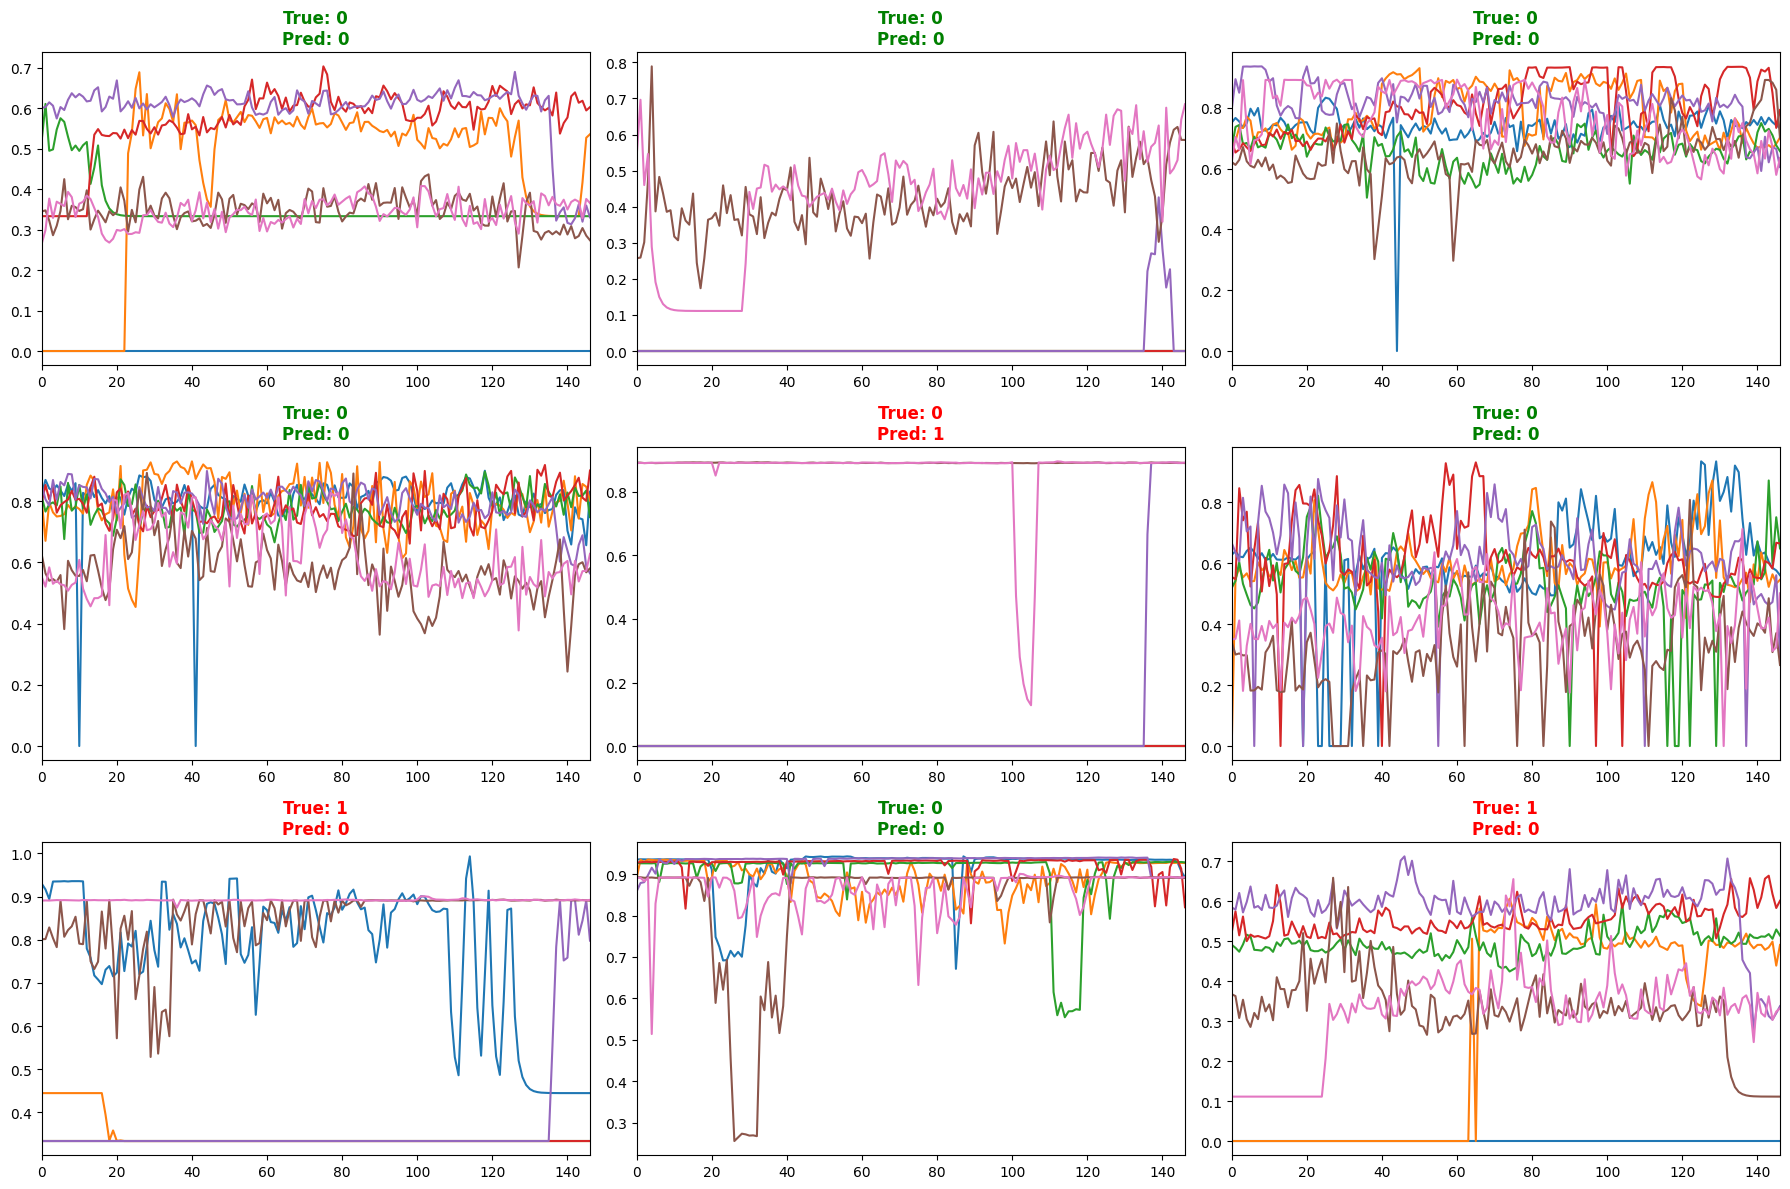

In [ ]:
learn_tst.show_results()

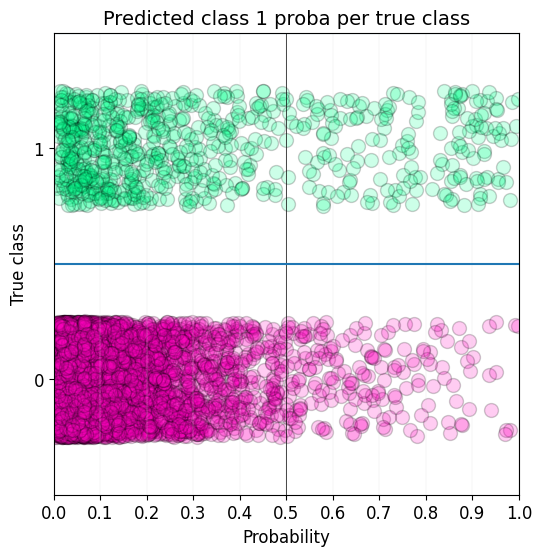

In [ ]:
learn_tst.show_probas()

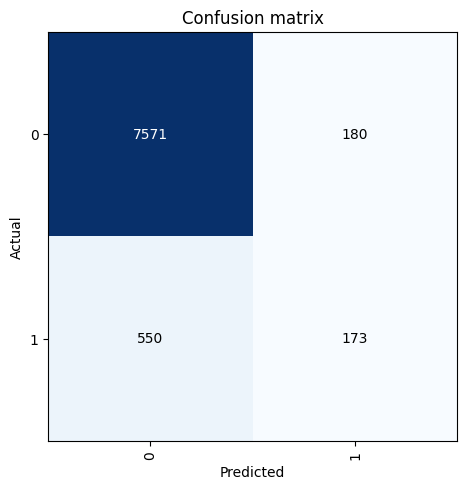

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_tst)
interp.plot_confusion_matrix()

## Hyperparameter optimization

In [ ]:
!pip install optuna-integration -U >> /dev/null

In [ ]:
import optuna
from optuna.integration import FastAIPruningCallback

def objective(trial:optuna.Trial):

    # Define search space here. More info here https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/002_configurations.html
    # d_model_rate = trial.suggest_categorical('d_model_rate', [128, 256, 384, 512, 1024]) # search through all categorical values in the provided list

    # depth = trial.suggest_int('depth', 3, 9, step=3) # search through all integer values between 3 and 9 with 3 increment steps
    # n_heads_rate = trial.suggest_categorical('n_heads_rate', [8, 10, 12, 14, 16])

    # dff_rate = trial.suggest_categorical('dff_rate', [256, 384, 512, 1024])
    # n_layers_rate = trial.suggest_categorical('n_layers_rate', [2, 3, 4, 5, 6])
    # dropout_rate = trial.suggest_float("dropout_rate", 0.0, 0.5, step=.1) # search through all float values between 0.0 and 0.5 with 0.1 increment steps
    # fc_dropout_rate = trial.suggest_float("fcdropout_rate", 0.0, 0.5, step=.1) # search through all float values between 0.0 and 0.5 with 0.1 increment steps
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)  # search through all float values between 0.0 and 0.5 in log increment steps
    kernel_size = trial.suggest_categorical('kernel_size', [3, 5, 7, 40])
    depth = trial.suggest_categorical('depth', [2, 3, 4, 5, 6])

    batch_tfms = TSStandardize(by_sample=True)
    learn = TSClassifier(X, y, splits=splits, bs=100,
                         arch=InceptionTime,
                         arch_config={
                            #  'c_in':dls.vars,
                            #  'c_out':dls.c,
                            #  'seq_len':dls.len,
                            #  'd_model':d_model_rate,
                            #  'd_ff':dff_rate,
                            #  'n_heads':n_heads_rate,
                            #  'n_layers':n_layers_rate,
                            #  'dropout':dropout_rate,
                            #  'fc_dropout':fc_dropout_rate,
                            #  'act':'gelu'
                             'kernel_size':kernel_size,
                            'depth':depth,
                         },
                        #  batch_tfms=batch_tfms,
                         batch_tfms=TSStandardize(by_sample=True),
                         metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()],
                         cbs=FastAIPruningCallback(trial))


    with ContextManagers([learn.no_logging(), learn.no_bar()]): # [Optional] this prevents fastai from printing anything during training
        learn.fit_one_cycle(5, lr_max=learning_rate)

    # Return the objective value
    return learn.recorder.values[-1][1] # return the validation loss value of the last epoch

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

[I 2024-08-26 18:16:07,802] A new study created in memory with name: no-name-92c71505-37fd-4873-9405-0d9f0356c60d
[W 2024-08-26 18:16:08,998] Trial 0 failed with parameters: {'learning_rate': 7.098626745091894e-05, 'kernel_size': 5, 'depth': 2} because of the following error: TypeError("InceptionModule.__init__() got an unexpected keyword argument 'kernel_size'").
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-18-e2c1aa52b280>", line 21, in objective
    learn = TSClassifier(X, y, splits=splits, bs=100,
  File "/usr/local/lib/python3.10/dist-packages/tsai/tslearner.py", line 71, in __init__
    model = build_ts_model(arch, dls=dls,
  File "/usr/local/lib/python3.10/dist-packages/tsai/models/utils.py", line 189, in build_ts_model
    model = arch(c_in, c_out, seq_len=seq_len, **arch_config, **kwargs).to(device=device)
  File "/usr/local/lib/pyt

TypeError: InceptionModule.__init__() got an unexpected keyword argument 'kernel_size'

In [ ]:
print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
display(optuna.visualization.plot_optimization_history(study))
display(optuna.visualization.plot_param_importances(study))
display(optuna.visualization.plot_slice(study))
display(optuna.visualization.plot_parallel_coordinate(study))

## Retrain with the best hyperparameters

In [ ]:
layers=3  # number of encoder layers
heads=14  # number of heads
dim_model=128  # dimension of model
d_ff=1024  # dimension of fully connected network (fcn)
# attn_dropout=0.,
dropout=0.2  # dropout applied to all linear layers in the encoder
fcdropout=0.3
# lr = 0.0008146920728373649
lr = 0.0001

patch_len=16  # patch_len
stride=8  # stride
c_in=7
c_out=1
seq_len=147
kernel_size=3
activation = "gelu"
n_epochs=20


model_tst = TST(c_in=dls.vars, c_out=dls.c, seq_len=dls.len, max_seq_len=dls.len, d_model=dim_model, d_ff=d_ff, act=activation, n_heads=heads, dropout=dropout, n_layers=layers, fc_dropout=fcdropout)
learn_tst = Learner(dls, model_tst, loss_func=LabelSmoothingCrossEntropyFlat(), metrics=[RocAucBinary(), accuracy, Precision(), Recall(), F1Score()],  cbs=ShowGraphCallback2())
learn_tst.lr_find()

OutOfMemoryError: CUDA out of memory. Tried to allocate 5.52 GiB. GPU 0 has a total capacity of 14.75 GiB of which 3.13 GiB is free. Process 20717 has 11.62 GiB memory in use. Of the allocated memory 7.50 GiB is allocated by PyTorch, and 3.99 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model_tst

In [ ]:
start = time.time()
learn_tst.fit_one_cycle(n_epochs, lr_max=lr)
print('\nElapsed time:', time.time() - start)

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.16 GiB. GPU 0 has a total capacity of 14.75 GiB of which 1.50 GiB is free. Process 3785 has 13.25 GiB memory in use. Of the allocated memory 12.95 GiB is allocated by PyTorch, and 153.83 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
learn_tst.plot_metrics()

In [ ]:
# To save all
learn_tst.save_all(path='/content/drive/My Drive/TFM/models', dls_fname='TST_v4_dls', model_fname='TST_v4_model', learner_fname='TST_v4_learner')

# ML Section

## Feature engineering

In [ ]:
'''
    General statistics per month
'''
monthly_sum = df_red_processed.resample('M', axis=1).sum()
monthly_min = df_red_processed.resample('M', axis=1).min()
monthly_max = df_red_processed.resample('M', axis=1).max()
monthly_std = df_red_processed.resample('M', axis=1).std()
monthly_mean = df_red_processed.resample('M', axis=1).mean()
monthly_mode = df_red_processed.resample('M', axis=1).apply(lambda x: x.mode(axis=1)[0])
monthly_diff = monthly_max - monthly_min

<ipython-input-7-7ebd62f351c2>:4: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_sum = df_red_processed.resample('M', axis=1).sum()
<ipython-input-7-7ebd62f351c2>:5: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_min = df_red_processed.resample('M', axis=1).min()
<ipython-input-7-7ebd62f351c2>:6: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_max = df_red_processed.resample('M', axis=1).max()
<ipython-input-7-7ebd62f351c2>:7: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_std = df_red_processed.resample('M', axis=1).std()
<ipython-input-7-7ebd62f351c2>:8: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_mean = df_red_processed.re

In [ ]:
monthly_sum_mean = monthly_sum.mean(axis=1).rename('month_sum_mean')
monthly_min_mean = monthly_min.mean(axis=1).rename('month_min_mean')
monthly_max_mean = monthly_max.mean(axis=1).rename('month_max_mean')
monthly_std_mean = monthly_std.mean(axis=1).rename('month_std_mean')
monthly_mean_mean = monthly_mean.mean(axis=1).rename('month_mean_mean')
monthly_mode_mean = monthly_mode.mean(axis=1).rename('month_mode_mean')
monthly_diff_mean = monthly_diff.mean(axis=1).rename('month_diff_mean')

In [ ]:
'''
    General statistics per week
'''
weekly_sum = df_red_processed.resample('W', axis=1).sum()
weekly_min = df_red_processed.resample('W', axis=1).min()
weekly_max = df_red_processed.resample('W', axis=1).max()
weekly_std = df_red_processed.resample('W', axis=1).std()
weekly_mean = df_red_processed.resample('W', axis=1).mean()
weekly_mode = df_red_processed.resample('W', axis=1).apply(lambda x: x.mode(axis=1)[0])
weekly_diff = weekly_max - weekly_min

<ipython-input-33-60dae23662ab>:4: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_sum = df_red_processed.resample('W', axis=1).sum()
<ipython-input-33-60dae23662ab>:5: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_min = df_red_processed.resample('W', axis=1).min()
<ipython-input-33-60dae23662ab>:6: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_max = df_red_processed.resample('W', axis=1).max()
<ipython-input-33-60dae23662ab>:7: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_std = df_red_processed.resample('W', axis=1).std()
<ipython-input-33-60dae23662ab>:8: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_mean = df_red_processed.re

In [ ]:
weekly_diff

2014-01-12  2014-01-19  2014-01-26  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.073895    0.130178    0.205987   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.054361    0.167263    0.295498   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.604810    0.000000    0.923350   
A9A0FE83467A680FBFB0DBFC910DF227    0.130035    0.235778    0.180049   
D9A6ADA018FA46A55D5438370456AA45    0.308856    0.191411    0.127519   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-02-02  2014-02-09  2014-02-16  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.000000    0.000000   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.119074    0.064706    0.093039   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.121266    0.220230    0.295498   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.578785    0.675596    0.760957   
A9A0FE83467A680FBFB0DBFC910DF227    0.347237    0.092882    0.127177   
D9A6ADA018FA46A55D5438370456AA45    0.522006    0.319991    0.200425   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-02-23  2014-03-02  2014-03-09  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.000000    0.205292    0.099678   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000    0.000000    0.000000   
EDFC78B07BA2908B3395C4EB2304665E    0.059346    0.057814    0.089210   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.071087    0.022302    0.105933   
...                                      ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000    0.000000    0.000000   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.365384    0.489261    1.000000   
A9A0FE83467A680FBFB0DBFC910DF227    0.325803    0.295794    0.132893   
D9A6ADA018FA46A55D5438370456AA45    0.152970    0.238071    0.204667   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000    0.000000    0.000000   

                                  2014-03-16  ...  2016-09-04  2016-09-11  \
CONS_NO                                       ...                           
0387DD8A07E07FDA6271170F86AD9151    0.052683  ...    0.485775    0.285677   
01D6177B5D4FFE0CABA9EF17DAFC2B84    0.000000  ...    0.000000    0.000000   
B32AC8CC6D5D805AC053557AB05F5343    0.000000  ...    0.335928    0.260436   
EDFC78B07BA2908B3395C4EB2304665E    0.047094  ...    0.300940    0.212113   
34C1954AA3703C4F8BD8EAEA7C4B7B83    0.022302  ...    0.204897    0.249501   
...                                      ...  ...         ...         ...   
F1472871E1AFF49D4289564B6377D76C    0.000000  ...    0.075309    0.202321   
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0.646449  ...    0.130123    0.270655   
A9A0FE83467A680FBFB0DBFC910DF227    0.120033  ...    0.582744    0.788785   
D9A6ADA018FA46A55D5438370456AA45    0.122747  ...    0.250531    0.169407   
F3406636BAD1E6E0826E8EDDC9A1BF00    0.000000  ...    0.340953    0.242496   

                                  2016-09-18  2016-09-25  2016-10-02  \
CONS_NO                                                                
0387DD8A07E07FDA6271170F86AD9151    0.174622    0.153845    0.261933   
01D61

In [ ]:
weekly_sum_mean = weekly_sum.mean(axis=1).rename('weekly_sum_mean')
weekly_min_mean = weekly_min.mean(axis=1).rename('weekly_min_mean')
weekly_max_mean = weekly_max.mean(axis=1).rename('weekly_max_mean')
weekly_std_mean = weekly_std.mean(axis=1).rename('weekly_std_mean')
weekly_mean_mean = weekly_mean.mean(axis=1).rename('weekly_mean_mean')
weekly_mode_mean = weekly_mode.mean(axis=1).rename('weekly_mode_mean')
weekly_diff_mean = weekly_diff.mean(axis=1).rename('weekly_diff_mean')

In [ ]:
manual_features = pd.concat([monthly_sum_mean,
                             monthly_min_mean,
                             monthly_max_mean,
                             monthly_std_mean,
                             monthly_mean_mean,
                             monthly_mode_mean,
                             monthly_diff_mean,
                             weekly_sum_mean,
                             weekly_min_mean,
                             weekly_max_mean,
                             weekly_std_mean,
                             weekly_mean_mean,
                             weekly_mode_mean,
                             weekly_diff_mean
                             ], axis=1)
manual_features

month_sum_mean  month_min_mean  \
CONS_NO                                                            
0387DD8A07E07FDA6271170F86AD9151        5.990166        0.093007   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.000000        0.000000   
B32AC8CC6D5D805AC053557AB05F5343        4.150233        0.054010   
EDFC78B07BA2908B3395C4EB2304665E        9.336949        0.173904   
34C1954AA3703C4F8BD8EAEA7C4B7B83        6.301648        0.027385   
...                                          ...             ...   
F1472871E1AFF49D4289564B6377D76C       10.996179        0.193230   
F3C8BBCD2DC26C1E0249DEEF6A4256B7       14.403193        0.216738   
A9A0FE83467A680FBFB0DBFC910DF227        5.485679        0.056948   
D9A6ADA018FA46A55D5438370456AA45       12.073258        0.214990   
F3406636BAD1E6E0826E8EDDC9A1BF00        3.693199        0.054538   

                                  month_max_mean  month_std_mean  \
CONS_NO                                                            
0387DD8A07E07FDA6271170F86AD9151        0.349885        0.066395   
01D6177B5D4FFE0CABA9EF17DAFC2B84        0.000000        0.000000   
B32AC8CC6D5D805AC053557AB05F5343        0.255874        0.055051   
EDFC78B07BA2908B3395C4EB2304665E        0.459231        0.076252   
34C1954AA3703C4F8BD8EAEA7C4B7B83        0.574956        0.144467   
...                                          ...             ...   
F1472871E1AFF49D4289564B6377D76C        0.612817        0.100551   
F3C8BBCD2DC26C1E0249DEEF6A4256B7        0.789478        0.149565   
A9A0FE83467A680FBFB0DBFC910DF227        0.436449        0.095682   
D9A6ADA018FA46A55D5438370456AA45        0.620705        0.103548   
F3406636BAD1E6E0826E8EDDC9A1BF00        0.216191        0.037870   

                                  month_mean_mean  month_mode_mean  \
CONS_NO                                                              
0387DD8A07E07FDA6271170F86AD9151         0.196294         0.112998   
01D6177B5D4FFE0CABA9EF17DAFC2B84         0.000000         0.000000   
B32AC8CC6D5D805AC053557AB05F5343         0.136425         0.085083   
EDFC78B07BA2908B3395C4EB2304665E         0.307687         0.260349   
34C1954AA3703C4F8BD8EAEA7C4B7B83         0.208253         0.115029   
...                                           ...              ...   
F1472871E1AFF49D4289564B6377D76C         0.361482         0.264197   
F3C8BBCD2DC26C1E0249DEEF6A4256B7         0.474776         0.277574   
A9A0FE83467A680FBFB0DBFC910DF227         0.180813         0.152580   
D9A6ADA018FA46A55D5438370456AA45         0.398648         0.307390   
F3406636BAD1E6E0826E8EDDC9A1BF00         0.121297         0.077141   

                                  month_diff_mean  weekly_sum_mean  \
CONS_NO                                                              
0387DD8A07E07FDA6271170F86AD9151         0.256878         1.376119   
01D6177B5D4FFE0CABA9EF17DAFC2B84         0.000000         0.000000   
B32AC8CC6D5D805AC053557AB05F5343         0.201864         0.953432   
EDFC78B07BA2908B3395C4EB2304665E         0.285326         2.144975   
34C1954AA3703C4F8BD8EAEA7C4B7B83         0.547571         1.447676   
...                                           ...              ...   
F1472871E1AFF49D4289564B6377D76C         0.419586         2.526149   
F3C8BBCD2DC26C1E0249DEEF6A4256B7         0.572739         3.308842   
A9A0FE83467A680FBFB0DBFC910DF227         0.379501         1.260224   
D9A6ADA018FA46A55D5438370456AA45         0.405715         2.773586   
F3406636BAD1E6E0826E8EDDC9A1BF00         0.161653         0.848438   

                                  weekly_min_mean  weekly_max_mean  \
CONS_NO                                                              
0387DD8A07E07FDA6271170F86AD9151         0.143422         0.261315   
01D6177B5D4FFE0CABA9EF17DAFC2B84         0.000000         0.000000   
B32AC8CC6D5D805AC053557AB05F5343         0.084717         0.192125   
EDFC78B07BA2908B3395C4EB2304665E         0.238927         0.389219   
34C1954AA3703C4F8BD8EA

## Split dataset

The trainings are performed on the processed raw dataseries (interpoolation, minmax normalization, and 3 thumb rule for outliers)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                                important_features,
                                                label_red.values,
                                                test_size=.2,
                                                random_state=42,
                                                stratify=label_red.values,
                                                shuffle=True)
y_train.sum(), y_test.sum()

(2628, 657)

## SMOTE Data augmentation

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_full_train, y_train)

In [ ]:
y_train_resampled.sum()

29520

## TSFresh feature extraction

In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [ ]:
def reshape_for_tsfresh(df, isAugmented=False):
    df_red_processed_tsfresh = df.copy()
    df_red_processed_tsfresh.columns = range(1, len(df.columns)+1)
    df_red_processed_tsfresh.reset_index(inplace=True)

    if isAugmented == False:
        df_red_processed_tsfresh.drop('CONS_NO', axis=1, inplace=True)
        df_red_processed_tsfresh.reset_index(inplace=True)

    df_red_processed_tsfresh.rename(columns={'index': 'id'}, inplace=True)

    reshaped_df = pd.melt(df_red_processed_tsfresh, id_vars='id', var_name='Day', value_name='Value')
    reshaped_df.sort_values(by=['id', 'Day'], inplace=True)
    reshaped_df.reset_index(drop=True, inplace=True)

    return reshaped_df

In [ ]:
# reshaped_df = reshape_for_tsfresh(X_train_resampled)

In [ ]:
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

extracted_features_train_augmented = extract_features(reshaped_df, column_id="id", column_sort="Day", impute_function=impute)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
Feature Extraction:   5%|▍         | 2691/59040 [1:00:04<20:09:26,  1.29s/it]

In [ ]:
from tsfresh import select_features

important_features_2016 = select_features(extracted_features_2016, label_red)
important_features_2016

Value__percentage_of_reoccurring_values_to_all_values  \
0000E78A22CB04533A0D9E1F2FBEEC5D                                           0.600000       
0002D8E9C198E4A2B03BFA6D1E2E1B6D                                           0.199187       
000395F84A94D4CB2E5D4D77372CFB4D                                           0.057762       
0009290EB794D35944F1DD36FE324F3A                                           0.183761       
000E6116D092E1C94AF3EFA5998363B0                                           0.059859       
...                                                                             ...       
FFF907FA53B0D30D5A1A433363EF2FD9                                           0.416149       
FFFAF88056E566935180028666FD24AD                                           0.044674       
FFFBCB1DC562EB890DDCC74B3BE7C1AE                                           0.117647       
FFFDCC5003A692984315154FA7409B60                                           0.062937       
FFFDE28BE9E1DC2A8ED599282AF34B33                                           0.155378       

                                  Value__percentage_of_reoccurring_datapoints_to_all_datapoints  \
0000E78A22CB04533A0D9E1F2FBEEC5D                                           0.993421               
0002D8E9C198E4A2B03BFA6D1E2E1B6D                                           0.351974               
000395F84A94D4CB2E5D4D77372CFB4D                                           0.141447               
0009290EB794D35944F1DD36FE324F3A                                           0.371711               
000E6116D092E1C94AF3EFA5998363B0                                           0.121711               
...                                                                             ...               
FFF907FA53B0D30D5A1A433363EF2FD9                                           0.690789               
FFFAF88056E566935180028666FD24AD                                           0.085526               
FFFBCB1DC562EB890DDCC74B3BE7C1AE                                           0.950658               
FFFDCC5003A692984315154FA7409B60                                           0.118421               
FFFDE28BE9E1DC2A8ED599282AF34B33                                           0.302632               

                                  Value__ratio_value_number_to_time_series_length  \
0000E78A22CB04533A0D9E1F2FBEEC5D                                         0.016447   
0002D8E9C198E4A2B03BFA6D1E2E1B6D                                         0.809211   
000395F84A94D4CB2E5D4D77372CFB4D                                         0.911184   
0009290EB794D35944F1DD36FE324F3A                                         0.769737   
000E6116D092E1C94AF3EFA5998363B0                                         0.934211   
...                                                                           ...   
FFF907FA53B0D30D5A1A433363EF2FD9                                         0.529605   
FFFAF88056E566935180028666FD24AD                                         0.957237   
FFFBCB1DC562EB890DDCC74B3BE7C1AE                                         0.055921   
FFFDCC5003A692984315154FA7409B60                                         0.940789   
FFFDE28BE9E1DC2A8ED599282AF34B33                                         0.825658   

                                  Value__ar_coefficient__coeff_1__k_10  \
0000E78A22CB04533A0D9E1F2FBEEC5D                              0.529877   
0002D8E9C198E4A2B03BFA6D1E2E1B6D                              0.187833   
000395F84A94D4CB2E5D4D77372CFB4D                              0.459706   
0009290EB794D35944F1DD36FE324F3A                              0.597909   
000E6116D092E1C94AF3EFA5998363B0                              0.460315   
...                                                                ...   
FFF907FA53B0D30D5A1A433363EF2FD9                              0.267453   
FFFAF88056E566935180028666FD24AD                              0.344727   
FFFBCB1DC562EB890DDCC74B3BE7C1AE                              1.0

In [ ]:
features_extracted.head()

Value__variance_larger_than_standard_deviation  Value__has_duplicate_max  \
0                                             0.0                       1.0   
1                                             0.0                       1.0   
2                                             0.0                       1.0   
3                                             0.0                       1.0   
4                                             0.0                       1.0   

   Value__has_duplicate_min  Value__has_duplicate  Value__sum_values  \
0                       1.0                   1.0         203.665646   
1                       1.0                   1.0           0.000000   
2                       1.0                   1.0         141.107939   
3                       1.0                   1.0         317.456261   
4                       1.0                   1.0         214.256044   

   Value__abs_energy  Value__mean_abs_change  Value__mean_change  \
0          97.593515                0.039513            0.000162   
1           0.000000                0.000000            0.000000   
2          67.541940                0.034607            0.000233   
3         138.499562                0.049328            0.000126   
4         104.516097                0.099578            0.000163   

   Value__mean_second_derivative_central  Value__median  ...  \
0                              -0.000029       0.156071  ...   
1                               0.000000       0.000000  ...   
2                              -0.000027       0.000000  ...   
3                              -0.000010       0.240063  ...   
4                               0.000014       0.128235  ...   

   Value__fourier_entropy__bins_5  Value__fourier_entropy__bins_10  \
0                        0.155665                         0.215617   
1                        0.136002                         0.245901   
2                        0.190068                         0.260704   
3                        0.136002                         0.181214   
4                        0.136002                         0.215617   

   Value__fourier_entropy__bins_100  \
0                          0.785939   
1                          1.306531   
2                          1.195611   
3                          0.941461   
4                          1.599767   

   Value__permutation_entropy__dimension_3__tau_1  \
0                                        1.452301   
1                                       -0.000000   
2                                        1.231463   
3                                        1.765519   
4                                        1.672325   

   Value__permutation_entropy__dimension_4__tau_1  \
0                                        2.389984   
1                                       -0.000000   
2                                        1.972190   
3                                        3.088785   
4                                        2.871742   

   Value__permutation_entropy__dimension_5__tau_1  \
0                                        3.318429   
1                                       -0.000000   
2                                        2.712376   
3                                        4.560978   
4                                        4.199241   

   Value__permutation_entropy__dimension_6__tau_1  \
0                                        4.057389   
1                                       -0.000000   
2                                        3.259420   
3                                        5.923653   
4                                        5.374427   

   Value__permutation_entropy__dimension_7__tau_1  \
0                                        4.345421   
1                                       -0.000000   
2                                        3.487657   
3                                        6.672598   
4                                        6.027760   

   Value__query_similarity_count__query_None__thre

In [ ]:
label_red.reset_index(drop=True, inplace=True)

In [ ]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

relevance_table = calculate_relevance_table(features_extracted, label_red, ml_task='classification')
relevance_table

In [ ]:
relevant_ft = relevance_table[relevance_table.relevant == True].sort_values(by='p_value', ascending=True)
relevant_ft

feature  \
feature                                                                                                 
Value__percentage_of_reoccurring_values_to_all_...  Value__percentage_of_reoccurring_values_to_all...   
Value__ar_coefficient__coeff_1__k_10                             Value__ar_coefficient__coeff_1__k_10   
Value__autocorrelation__lag_1                                           Value__autocorrelation__lag_1   
Value__partial_autocorrelation__lag_1                           Value__partial_autocorrelation__lag_1   
Value__fft_aggregated__aggtype_"skew"                           Value__fft_aggregated__aggtype_"skew"   
...                                                                                               ...   
Value__fft_coefficient__attr_"real"__coeff_44           Value__fft_coefficient__attr_"real"__coeff_44   
Value__fft_coefficient__attr_"angle"__coeff_70         Value__fft_coefficient__attr_"angle"__coeff_70   
Value__fft_coefficient__attr_"angle"__coeff_35         Value__fft_coefficient__attr_"angle"__coeff_35   
Value__fft_coefficient__attr_"imag"__coeff_51           Value__fft_coefficient__attr_"imag"__coeff_51   
Value__fft_coefficient__attr_"angle"__coeff_17         Value__fft_coefficient__attr_"angle"__coeff_17   

                                                    type        p_value  \
feature                                                                   
Value__percentage_of_reoccurring_values_to_all_...  real  3.698143e-285   
Value__ar_coefficient__coeff_1__k_10                real  8.746430e-183   
Value__autocorrelation__lag_1                       real  3.722959e-169   
Value__partial_autocorrelation__lag_1               real  3.729048e-169   
Value__fft_aggregated__aggtype_"skew"               real  1.405210e-167   
...                                                  ...            ...   
Value__fft_coefficient__attr_"real"__coeff_44       real   3.627122e-03   
Value__fft_coefficient__attr_"angle"__coeff_70      real   3.654268e-03   
Value__fft_coefficient__attr_"angle"__coeff_35      real   3.750227e-03   
Value__fft_coefficient__attr_"imag"__coeff_51       real   3.960783e-03   
Value__fft_coefficient__attr_"angle"__coeff_17      real   3.978305e-03   

                                                    relevant  
feature                                                       
Value__percentage_of_reoccurring_values_to_all_...      True  
Value__ar_coefficient__coeff_1__k_10                    True  
Value__autocorrelation__lag_1                           True  
Value__partial_autocorrelation__lag_1                   True  
Value__fft_aggregated__aggtype_"skew"                   True  
...                                                      ...  
Value__fft_coefficient__attr_"real"__coeff_44           True  
Value__fft_coefficient__attr_"angle"__coeff_70          True  
Value__fft_coefficient__attr_"angle"__coeff_35          True  
Value__fft_coefficient__attr_"imag"__coeff_51           True  
Value__fft_coefficient__attr_"angle"__coeff_17          True  

[492 rows x 4 columns]

In [ ]:
'''
  Exportar la tabla relevance_table a un csv
'''
# relevance_table.to_csv('relevance_table.csv', index=False)

'\n  Exportar la tabla relevance_table a un csv\n'

In [ ]:
relevant_ft.describe()

p_value
count   4.920000e+02
mean    1.707083e-04
std     5.966903e-04
min    3.698143e-285
25%     9.589734e-38
50%     2.883594e-12
75%     2.512504e-06
max     3.978305e-03

In [ ]:
relevant_ft.head(50)

feature  \
feature                                                                                                 
Value__percentage_of_reoccurring_values_to_all_...  Value__percentage_of_reoccurring_values_to_all...   
Value__ar_coefficient__coeff_1__k_10                             Value__ar_coefficient__coeff_1__k_10   
Value__autocorrelation__lag_1                                           Value__autocorrelation__lag_1   
Value__partial_autocorrelation__lag_1                           Value__partial_autocorrelation__lag_1   
Value__fft_aggregated__aggtype_"skew"                           Value__fft_aggregated__aggtype_"skew"   
Value__percentage_of_reoccurring_datapoints_to_...  Value__percentage_of_reoccurring_datapoints_to...   
Value__fft_aggregated__aggtype_"centroid"                   Value__fft_aggregated__aggtype_"centroid"   
Value__fft_coefficient__attr_"abs"__coeff_1               Value__fft_coefficient__attr_"abs"__coeff_1   
Value__longest_strike_above_mean                                     Value__longest_strike_above_mean   
Value__autocorrelation__lag_2                                           Value__autocorrelation__lag_2   
Value__fft_aggregated__aggtype_"variance"                   Value__fft_aggregated__aggtype_"variance"   
Value__autocorrelation__lag_3                                           Value__autocorrelation__lag_3   
Value__agg_autocorrelation__f_agg_"mean"__maxla...  Value__agg_autocorrelation__f_agg_"mean"__maxl...   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__linear_trend__attr_"slope"                                   Value__linear_trend__attr_"slope"   
Value__autocorrelation__lag_4                                           Value__autocorrelation__lag_4   
Value__agg_autocorrelation__f_agg_"median"__max...  Value__agg_autocorrelation__f_agg_"median"__ma...   
Value__cid_ce__normalize_True                                           Value__cid_ce__normalize_True   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__autocorrelation__lag_5                                           Value__autocorrelation__lag_5   
Value__linear_trend__attr_"rvalue"                                 Value__linear_trend__attr_"rvalue"   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__large_standard_deviation__r_0.2                         Value__large_standard_deviation__r_0.2   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   
Value__fft_coefficient__attr_"imag"__coeff_1             Value__fft_coefficient__attr_"imag"__coeff_1   
Value__autocorrelation__lag_6                                           Value__autocorrelation__lag_6   
Value__agg_linear_trend__attr_"slope"__chunk_le...  Value__agg_linear_trend__attr_"slope"__chunk_l...   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   
Value__index_mass_quantile__q_0.7                                   Value__index_mass_quantile__q_0.7   
Value__index_mass_quantile__q_0.6                                   Value__index_mass_quantile__q_0.6   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   
Value__agg_linear_trend__attr_"rvalue"__chunk_l...  Value__agg_linear_trend__attr_"rvalue"__chunk_...   

In [ ]:
important_features.head()

Value__percentage_of_reoccurring_values_to_all_values  \
0                                           0.149020       
1                                           1.000000       
2                                           0.096471       
3                                           0.342988       
4                                           0.511936       

   Value__ar_coefficient__coeff_1__k_10  Value__autocorrelation__lag_1  \
0                              0.776822                       0.948181   
1                              0.000000                       0.849687   
2                              0.672386                       0.919865   
3                              0.678422                       0.915699   
4                              0.607357                       0.764340   

   Value__partial_autocorrelation__lag_1  \
0                               0.948181   
1                               0.849687   
2                               0.919865   
3                               0.915699   
4                               0.764340   

   Value__fft_aggregated__aggtype_"skew"  \
0                               1.225168   
1                               0.825440   
2                               0.958287   
3                               1.067581   
4                               0.727354   

   Value__percentage_of_reoccurring_datapoints_to_all_datapoints  \
0                                           0.578231               
1                                           1.000000               
2                                           0.626822               
3                                           0.581147               
4                                           0.821186               

   Value__fft_aggregated__aggtype_"centroid"  \
0                                 117.093542   
1                                 147.432050   
2                                 136.763395   
3                                 126.231258   
4                                 162.570592   

   Value__fft_coefficient__attr_"abs"__coeff_1  \
0                                    84.403336   
1                                     0.000000   
2                                    89.378276   
3                                    76.455357   
4                                    12.982034   

   Value__longest_strike_above_mean  Value__autocorrelation__lag_2  ...  \
0                             151.0                       0.914174  ...   
1                               0.0                       0.787748  ...   
2                             134.0                       0.875821  ...   
3                             106.0                       0.871027  ...   
4                              74.0                       0.644336  ...   

   Value__fft_coefficient__attr_"angle"__coeff_11  \
0                                        3.298013   
1                                        0.000000   
2                                       61.519116   
3                                       25.486970   
4                                      -48.730093   

   Value__fft_coefficient__attr_"real"__coeff_78  \
0                                      -0.553774   
1                                       0.000000   
2                                       0.050798   
3                                       6.643630   
4                                      -0.900068   

   Value__fft_coefficient__attr_"angle"__coeff_36  \
0                                      176.249374   
1                                        0.000000   
2                                      129.155088   
3                                      156.816230   
4                                       94.133720   

   Value__fft_coefficient__attr_"angle"__coeff_73  \
0                                       18.604282   
1                                        0.000000   
2                                      130.757562   
3                                       51.319329   
4

## Training

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score

### Pipeline

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# calculate class weights based on the training data
class_weights = compute_class_weight('balanced', classes=[0, 1], y=label_red.values)
class_weights

array([0.5445122 , 6.11643836])

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from drive.MyDrive.TFM.code.Utils.data import load_file


directory_data = 'datasets/tsfresh_features'
directory_labels = 'datasets/sgcc_processed'
dataset_name = 'tsfresh_important_features'
label_name = 'labels'
customDataSource = "important features + training data augmented"

augmented = False
customData = True
filteredByImportance = True

if(customData):
  print(f"Source: {customDataSource}")
else:
  data = load_file(directory_data, dataset_name)
  labels = load_file(directory_labels, label_name)
  print(f"Directory: {directory_data}")
  print(f"Dataset name: {dataset_name} - Label name: {label_name}")
  print(f'Dataset Shape: {data.shape} - Label Shape: {labels.shape}')

classifiers_ensemble = [
    RandomForestClassifier(random_state=42,
                           bootstrap=True,
                          class_weight= 'balanced_subsample',
                          max_depth= 10,
                          max_features= 'sqrt',
                          min_samples_leaf= 4,
                          min_samples_split= 2,
                          n_estimators= 200),
    XGBClassifier(random_state=42,
                  learning_rate= 0.1,
                  max_depth=5,
                  n_estimators=300,
                  reg_alpha=0,
                  reg_lambda=0,
                  subsample=0.8),
    LogisticRegression(random_state=42,
                        C= 100,
                        class_weight='balanced',
                        max_iter= 200,
                        penalty='l1',
                        solver= 'liblinear',
                        ),
]

meta_model = LogisticRegression(random_state=42)
# meta_model = classifiers_ensemble[2]

# Crear el stacking classifier
stacking_classifier = StackingClassifier(
    estimators=[('rf', classifiers_ensemble[0]), ('xgb', classifiers_ensemble[1]), ('lr', classifiers_ensemble[2])],
    final_estimator=meta_model,
    cv=5  # número de folds para la validación cruzada
)

# classifiers = classifiers_ensemble
classifiers = [
    classifiers_ensemble[0],
    classifiers_ensemble[1],
    classifiers_ensemble[2],
    VotingClassifier(
        estimators=[('rf', classifiers_ensemble[0]), ('lr', classifiers_ensemble[2]), ('xgb', classifiers_ensemble[1])],
        voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
    ),
    # stacking_classifier
]

if(customData):
  y_train = load_file('features', 'features_extracted_xtrainaug_labels')
  y_test = load_file('features', 'features_extracted_xtest_labels')

  # X_train = load_file('features', 'tsfresh_important_features_from_trainaug')
  X_train = load_file('features', 'features_extracted_xtrainaug')

  # importat_features_test = load_file('features', 'tsfresh_important_features_from_test')
  # X_test = importat_features_test[X_train.columns]

  importat_features_test = load_file('features', 'tsfresh_important_features_from_test')
  X_test = importat_features_test[top_median['feature']]

else:
  X_train, X_test, y_train, y_test = train_test_split(
                                                  data,
                                                  labels.values,
                                                  test_size=.2,
                                                  random_state=42,
                                                  stratify= labels.values,
                                                  shuffle=True)


print(f'Augmented: {augmented}')
print(f'customData: {customData}')
print(f'filteredByImportance: {filteredByImportance}')

if(augmented):
    #Testing the same strategy as the article
    from collections import Counter
    from imblearn.over_sampling import SMOTE

    sm = SMOTE(random_state=42)
    X_train_aug, y_train_aug = sm.fit_resample(X_train, y_train)
    print(f"Original dataset shape {Counter(y_train)}")
    print(f"Resampled dataset shape {Counter(y_train_aug)}")
    X_train = X_train_aug
    y_train = y_train_aug


print(f"Train shape: {X_train.shape} - Test shape: {X_test.shape}")
predictions = []
predictions_probabilities = []

for clf in classifiers:
    print(f'\nTraining classifier {clf.__class__.__name__} ...')


    if(filteredByImportance):
      print(f"Features filtered by top_p75")
      X_train = X_train[top_p75['feature']]
      X_test = X_test[top_p75['feature']]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    predictions.append(y_pred)

    probabilities_clf = clf.predict_proba(X_test)[:, 1]
    predictions_probabilities.append(probabilities_clf)
    print(clf.__class__.__name__)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # probabilities_clf = rf_clf.predict_proba(X_test_filtered)[:, 1]
    # fpr_clf, tpr_clf, __clf = roc_curve(y_test, probabilities_clf)
    roc_auc_clf = roc_auc_score(y_test, probabilities_clf)
    print(f'AUC: {roc_auc_clf}')

    # print('AUC:', roc_auc_score(y_test, y_pred))
    print("------")

Source: important features + training data augmented
Augmented: False
customData: True
filteredByImportance: True
Train shape: (59040, 783) - Test shape: (8037, 137)

Training classifier RandomForestClassifier ...
Features filtered by top_p75
RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.48      0.15      0.23       657

    accuracy                           0.92      8037
   macro avg       0.70      0.57      0.59      8037
weighted avg       0.89      0.92      0.90      8037

[[7272  108]
 [ 559   98]]
AUC: 0.7634285555184318
------

Training classifier XGBClassifier ...
Features filtered by top_p75
XGBClassifier
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      7380
           1       0.55      0.23      0.32       657

    accuracy                           0.92      8037
   macro avg       0.74      0.61      0.64      

In [ ]:
0X_train = load_file('features', 'features_extracted_xtrainaug')
importat_features_test = load_file('features', 'tsfresh_important_features_from_test')
# X_test = importat_features_test[X_train.columns]

In [ ]:
# X_train[top_median['feature']]
importat_features_test[top_median['feature']]

Value__percentage_of_reoccurring_values_to_all_values  \
0                                              0.345029       
1                                              0.679144       
2                                              0.339572       
3                                              0.077778       
4                                              0.212851       
...                                                 ...       
8032                                           0.552561       
8033                                           1.000000       
8034                                           0.325000       
8035                                           0.150709       
8036                                           0.085714       

      Value__percentage_of_reoccurring_datapoints_to_all_datapoints  \
0                                              0.891156               
1                                              0.941691               
2                                              0.759961               
3                                              0.758017               
4                                              0.809524               
...                                                 ...               
8032                                           0.838678               
8033                                           1.000000               
8034                                           0.606414               
8035                                           0.534500               
8036                                           0.751215               

      Value__sum_of_reoccurring_data_points  \
0                                 29.149819   
1                                324.875830   
2                                150.594252   
3                                 18.471632   
4                                 63.456212   
...                                     ...   
8032                             327.090877   
8033                               0.000000   
8034                             198.352353   
8035                              89.601206   
8036                              18.298859   

      Value__ar_coefficient__coeff_1__k_10  \
0                                 0.624506   
1                                 0.418008   
2                                 0.492469   
3                                 0.610660   
4                                 0.580761   
...                                    ...   
8032                              0.194018   
8033                              0.000000   
8034                              0.471931   
8035                              0.439533   
8036                              0.684234   

      Value__ratio_value_number_to_time_series_length  \
0                                            0.166181   
1                                            0.181730   
2                                            0.363460   
3                                            0.262391   
4                                            0.241983   
...                                               ...   
8032                                         0.360544   
8033                                         0.000972   
8034                                         0.583090   
8035                                         0.548105   
8036                                         0.272109   

      Value__fft_coefficient__attr_"abs"__coeff_1  \
0                                       54.543078   
1                                       10.635682   
2                                       46.037446   
3                                      120.527145   
4                                      155.409084   
...                                           ...   
8032                                   137.866983   
8033                                     0.000000   
8034                                    44.121925   
8035                                   154.379788   
8036      

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42,
                                bootstrap=True,
                                class_weight= 'balanced_subsample',
                                max_depth= 10,
                                max_features= 'sqrt',
                                min_samples_leaf= 4,
                                min_samples_split= 2,
                                n_estimators= 200)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       min_samples_leaf=4, n_estimators=200, random_state=42)

In [ ]:
importances = rf_clf.feature_importances_
feature_names = data.columns

feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})


feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances.head(50)

feature  importance
0    Value__percentage_of_reoccurring_values_to_all...    0.032500
5    Value__percentage_of_reoccurring_datapoints_to...    0.023905
39               Value__sum_of_reoccurring_data_points    0.014970
1                 Value__ar_coefficient__coeff_1__k_10    0.012401
49     Value__ratio_value_number_to_time_series_length    0.011321
7          Value__fft_coefficient__attr_"abs"__coeff_1    0.010909
4                Value__fft_aggregated__aggtype_"skew"    0.009922
10           Value__fft_aggregated__aggtype_"variance"    0.009076
89                    Value__sum_of_reoccurring_values    0.007633
3                Value__partial_autocorrelation__lag_1    0.007275
6            Value__fft_aggregated__aggtype_"centroid"    0.006893
2                        Value__autocorrelation__lag_1    0.006871
41                   Value__index_mass_quantile__q_0.9    0.005421
177  Value__energy_ratio_by_chunks__num_segments_10...    0.005417
52   Value__agg_linear_trend__attr_"intercept"__chu...    0.005369
32                   Value__index_mass_quantile__q_0.7    0.005287
46                           Value__standard_deviation    0.004935
21   Value__agg_linear_trend__attr_"slope"__chunk_l...    0.004925
59   Value__agg_linear_trend__attr_"intercept"__chu...    0.004767
16                   Value__linear_trend__attr_"slope"    0.004717
19                       Value__cid_ce__normalize_True    0.004553
83                          Value__benford_correlation    0.004455
14   Value__agg_linear_trend__attr_"slope"__chunk_l...    0.004450
13   Value__agg_linear_trend__attr_"slope"__chunk_l...    0.004368
217                   Value__first_location_of_minimum    0.004361
122       Value__fft_coefficient__attr_"abs"__coeff_34    0.004293
57                   Value__index_mass_quantile__q_0.4    0.004285
62   Value__agg_linear_trend__attr_"stderr"__chunk_...    0.004260
47                                     Value__variance    0.004210
191  Value__energy_ratio_by_chunks__num_segments_10...    0.004142
183       Value__fft_coefficient__attr_"imag"__coeff_6    0.004111
23                  Value__linear_trend__attr_"rvalue"    0.004074
119  Value__agg_linear_trend__attr_"stderr"__chunk_...    0.004050
8                     Value__longest_strike_above_mean    0.003983
132  Value__change_quantiles__f_agg_"var"__isabs_Tr...    0.003972
205  Value__change_quantiles__f_agg_"var"__isabs_Tr...    0.003916
44                   Value__index_mass_quantile__q_0.8    0.003723
9                        Value__autocorrelation__lag_2    0.003714
15   Value__agg_linear_trend__attr_"slope"__chunk_l...    0.003640
64   Value__agg_linear_trend__attr_"intercept"__chu...    0.003627
33                   Value__index_mass_quantile__q_0.6    0.003529
76   Value__agg_linear_trend__attr_"intercept"__chu...    0.003424
28        Value__fft_coefficient__attr_"imag"__coeff_1    0.003407
134  Value__agg_linear_trend__attr_"stderr"__chunk_...    0.003353
30   Value__agg_linear_trend__attr_"slope"__chunk_l...    0.003311
161  Value__change_quantiles__f_agg_"var"__isabs_Tr...    0.003259
48         Value__fft_coefficient__attr_"abs"__coeff_2    0.003223
231  Value__change_quantiles__f_agg_"mean"__isabs_T...    0.003204
222                 Value__spkt_welch_density__coeff_8    0.003192
194  Value__change_quantiles__f_agg_"var"__isabs_Fa...    0.003146

In [ ]:
feature_importances.describe(percentiles=[.1, .25, .5, .75, .9, .95])

importance
count  492.000000
mean     0.002033
std      0.002268
min      0.000000
10%      0.001034
25%      0.001298
50%      0.001562
75%      0.002127
90%      0.003144
95%      0.004324
max      0.032500

In [ ]:
top_median = feature_importances[feature_importances['importance'] > 0.002033]
top_p75 = feature_importances[feature_importances['importance'] > 0.002127]
top_p90 = feature_importances[feature_importances['importance'] > 0.003144]
top_p95 = feature_importances[feature_importances['importance'] > 0.004324]

In [ ]:
top_median

feature  importance
0    Value__percentage_of_reoccurring_values_to_all...    0.032500
5    Value__percentage_of_reoccurring_datapoints_to...    0.023905
39               Value__sum_of_reoccurring_data_points    0.014970
1                 Value__ar_coefficient__coeff_1__k_10    0.012401
49     Value__ratio_value_number_to_time_series_length    0.011321
..                                                 ...         ...
391  Value__cwt_coefficients__coeff_12__w_10__width...    0.002061
182  Value__change_quantiles__f_agg_"mean"__isabs_T...    0.002059
363      Value__fft_coefficient__attr_"imag"__coeff_85    0.002057
400      Value__fft_coefficient__attr_"real"__coeff_95    0.002052
300       Value__fft_coefficient__attr_"real"__coeff_6    0.002033

[137 rows x 2 columns]

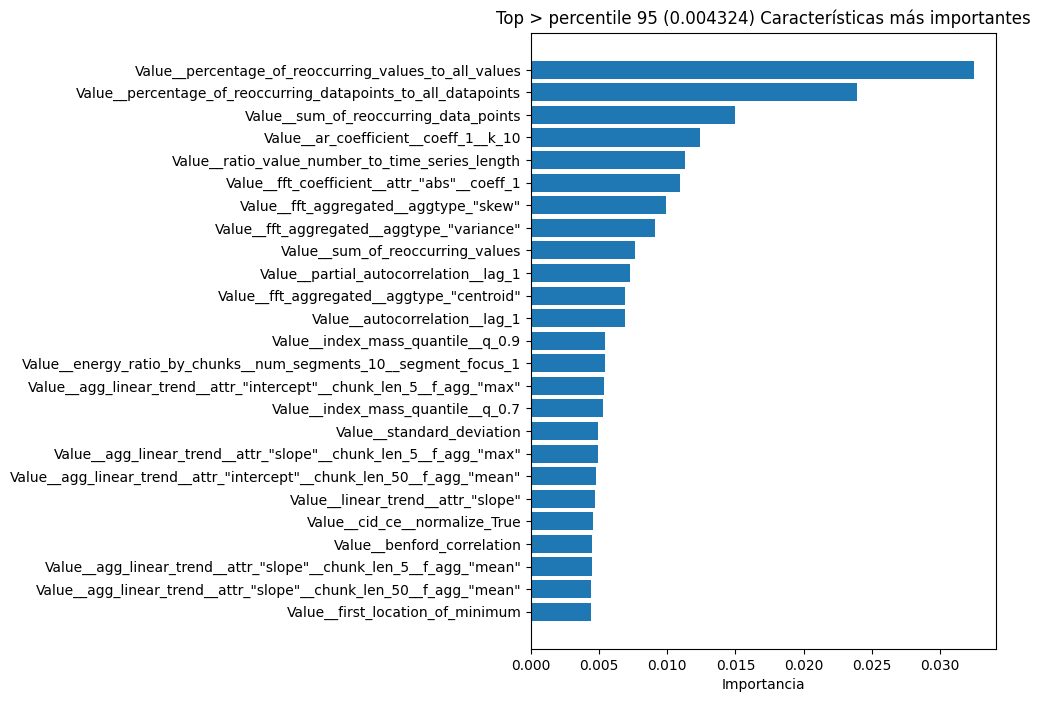

In [ ]:
import matplotlib.pyplot as plt

top_ft = '> percentile 95 (0.004324)'
# top_features = feature_importances.head(top_ft)
top_features = feature_importances[feature_importances['importance'] > 0.004324]


# Gráfico de barras
plt.figure(figsize=(6,8))
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importancia')
plt.title(f'Top {top_ft} Características más importantes')
plt.gca().invert_yaxis()  # Para que la característica más importante aparezca arriba
plt.show()

### Train again with features selected by RF

In [ ]:
X_train_filtered = X_train[top_features['feature']]
X_test_filtered = X_test[top_features['feature']]

rf_clf = RandomForestClassifier(random_state=42,
                           bootstrap=True,
                          class_weight= 'balanced_subsample',
                          max_depth= 10,
                          max_features= 'sqrt',
                          min_samples_leaf= 4,
                          min_samples_split= 2,
                          n_estimators= 200)

rf_clf.fit(X_train_filtered, y_train)

y_pred = rf_clf.predict(X_test_filtered)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7380
           1       0.25      0.44      0.32       657

    accuracy                           0.85      8037
   macro avg       0.60      0.66      0.62      8037
weighted avg       0.89      0.85      0.86      8037



In [ ]:
probabilities_rf = rf_clf.predict_proba(X_test_filtered)[:, 1]
fpr_clf_rf, tpr_clf_rf, __clf_rf = roc_curve(y_test, probabilities_rf)
roc_auc_clf_rf = roc_auc_score(y_test, probabilities_rf)
print(f'AUC: {roc_auc_clf_rf}')

AUC: 0.7703022072077647


In [ ]:
len(top_features)

25

Al reentrenar nuevamente el random forest con las caracteristicas mas importantes ( > 0.002033 que es el promedio ) determinadas por el mismo algoritmo en el entrenamiento inicial, permitio que alcanzara un valor de AUC de 0,78. Numero de caracterisiticas fue 137.
* Precision: 0.28,
* Recall: 0.45
* F1: 0.34

Al realizar filtrado de las caracteristicas importantes ubicadas en el percentile 75 (> 0.002127), el AUC obtenido es el mismo 0,78. El numero de caracteristicas utilizadas fue 122.

* Precision: 0,27
* Recall: 0.46
* F1 0.34

Al filtrar por el percentile 90 (> 0.003144), el AUC disminuyo algunos puntos decimales resultando en 0,7786. Caracteristicas utilizadas: 50
* Precision: 0.26
* Recall: 0.46
* F1: 0.33

Al filtrar por percentile 95 (0.004324), el AUC fue de 0.7703. Caracteristicas utilizadas: 25
* Precision: 0.25
* Recall: 0.44
* F1: 0.32



### Curva Precision-Recall

In [ ]:
prediction_ensamble = predictions[0]
prediction_proba_ensamble = predictions_probabilities[0]

In [ ]:
'''Obtener predicciones y probabilidades en el conjunto de validación con InceptionTime'''
# preds, targs = learn.get_preds()
# precision, recall, _ = precision_recall_curve(targs, preds[:, 1])

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Obtener las curvas Precision-Recall
# precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, predictions_probabilities[0])
# precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, predictions_probabilities[1])
# precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, predictions_probabilities[2])
precision_ensemble, recall_ensemble, thresholds_ensemble = precision_recall_curve(y_test, prediction_proba_ensamble)
# precision_it, recall_it, thresholds_it = precision_recall_curve(targs, preds[:, 1])

# Calcular la puntuación media de precisión
# ap_rf = average_precision_score(y_test, predictions_probabilities[0])
# ap_xgb = average_precision_score(y_test, predictions_probabilities[1])
# ap_lr = average_precision_score(y_test, predictions_probabilities[2])
ap_ensemble = average_precision_score(y_test, prediction_proba_ensamble)
# ap_it = average_precision_score(targs, preds[:, 1])

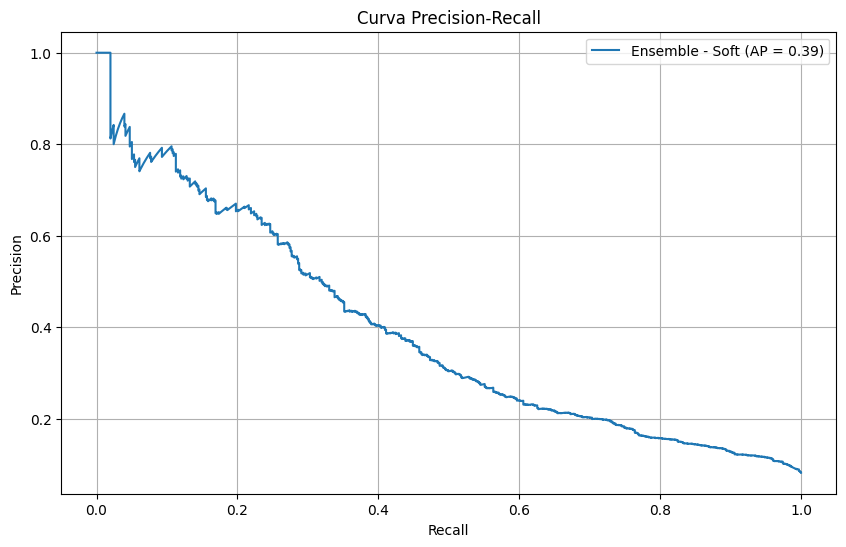

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficar las curvas de los modelos
# plt.plot(recall_rf, precision_rf, label=f'Random Forest (AP = {ap_rf:.2f})')
# plt.plot(recall_xgb, precision_xgb, label=f'XGBoost (AP = {ap_xgb:.2f})')
# plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AP = {ap_lr:.2f})')
plt.plot(recall_ensemble, precision_ensemble, label=f'Ensemble - Soft (AP = {ap_ensemble:.2f})')
# plt.plot(recall_it, precision_it, label=f'InceptionTime (AP = {ap_it:.2f})')

# Añadir detalles al gráfico
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.grid(True)
plt.show()


### Curva ROC

In [ ]:
# Calculate F1-score for each threshold
# f1_scores_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)
# f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
# f1_scores_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)
f1_scores_ensemble = 2 * (precision_ensemble * recall_ensemble) / (precision_ensemble + recall_ensemble)
# f1_scores_it = 2 * (precision_it * recall_it) / (precision_it + recall_it)

# Find the threshold that gives the highest F1-score
# best_threshold_f1_lr = thresholds_lr[np.argmax(f1_scores_lr)]
# best_threshold_f1_rf = thresholds_rf[np.argmax(f1_scores_rf)]
# best_threshold_f1_xgb = thresholds_xgb[np.argmax(f1_scores_xgb)]
best_threshold_f1_ensemble = thresholds_ensemble[np.argmax(f1_scores_ensemble)]
# best_threshold_f1_it = thresholds_it[np.argmax(f1_scores_it)]

# best_f1_score_lr = np.max(f1_scores_lr)
# best_f1_score_rf = np.max(f1_scores_rf)
# best_f1_score_xgb = np.max(f1_scores_xgb)
best_f1_score_ensemble = np.max(f1_scores_ensemble)
# best_f1_score_it = np.max(f1_scores_it)

# print(f'Best threshold for Logistic Regression (F1-score): {best_threshold_f1_lr}')
# print(f'Best F1-score: {best_f1_score_lr}')

# print(f'Best threshold for Random Forest (F1-score): {best_threshold_f1_rf}')
# print(f'Best F1-score: {best_f1_score_rf}')

# print(f'Best threshold for XGBoost (F1-score): {best_threshold_f1_xgb}')
# print(f'Best F1-score: {best_f1_score_xgb}')

print(f'Best threshold for Ensemble (F1-score): {best_threshold_f1_ensemble}')
print(f'Best F1-score: {best_f1_score_ensemble}')

# print(f'Best threshold for Ensemble (F1-score): {best_threshold_f1_it}')
# print(f'Best F1-score: {best_f1_score_it}')

Best threshold for Ensemble (F1-score): 0.4642318570399933
Best F1-score: 0.4069264069264069


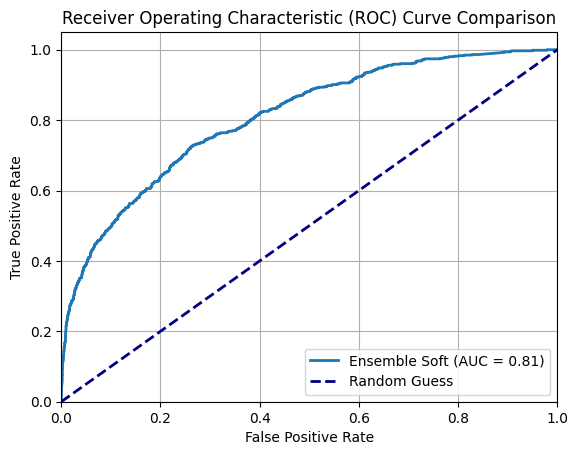

In [ ]:
# fpr_rf, tpr_rf, __rf = roc_curve(y_test, predictions_probabilities[0])
# roc_auc_rf = roc_auc_score(y_test, predictions_probabilities[0])
# plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# fpr_xgb, tpr_xgb, __xgb = roc_curve(y_test, predictions_probabilities[1])
# roc_auc_xgb = roc_auc_score(y_test, predictions_probabilities[1])
# plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')

# fpr_lr, tpr_lr, __lr = roc_curve(y_test, predictions_probabilities[2])
# roc_auc_lr = roc_auc_score(y_test, predictions_probabilities[2])
# plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

fpr_ensemble, tpr_ensemble, __ensemble = roc_curve(y_test, prediction_proba_ensamble)
roc_auc_ensemble = roc_auc_score(y_test, prediction_proba_ensamble)
plt.plot(fpr_ensemble, tpr_ensemble, lw=2, label=f'Ensemble Soft (AUC = {roc_auc_ensemble:.2f})')

# fpr_it, tpr_it, __it = roc_curve(targs, preds[:, 1])
# roc_auc_it = roc_auc_score(targs, preds[:, 1])
# plt.plot(fpr_it, tpr_it, lw=2, label=f'InceptionTime (AUC = {roc_auc_it:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# class_weight='balanced'
dt_clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_clf.fit(X_full_train, y_train)

y_pred = dt_clf.predict(X_full_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      7380
           1       0.07      0.12      0.09       657

    accuracy                           0.79      8037
   macro avg       0.49      0.49      0.48      8037
weighted avg       0.85      0.79      0.82      8037

AUC: 0.485 --

Results using df_proccesed_ftrs dataset:
* f1: 0.22
* recall: 0.24
* precision: 0.20
* AUC: 0.578

---

Results after augmenting X_train of df_red_processed dataset:
* f1: 0.21
* recall: 0.33
* precision: 0.15
* AUC: 0.583

---

Results of df_red_processed_2016 dataset:
* f1: 0.15
* recall: 0.15
* precision: 0.15
* AUC: 0.537

---

Results of df_red_processed_2016 augmented dataset:
* f1: 0.14
* recall: 0.24
* precision: 0.1
* AUC: 0.522

---


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# , class_weight='balanced', max_depth=3
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
y_pred = rf_clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --\n'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.92      0.05      0.10       657

    accuracy                           0.92      8037
   macro avg       0.92      0.53      0.53      8037
weighted avg       0.92      0.92      0.89      8037

AUC: 0.526 --


In [ ]:
feature_importances = pd.DataFrame({'feature': X_train_weeks.columns, 'importance': rf_clf.feature_importances_})
feature_importances.sort_values('importance', ascending=True, inplace=True)

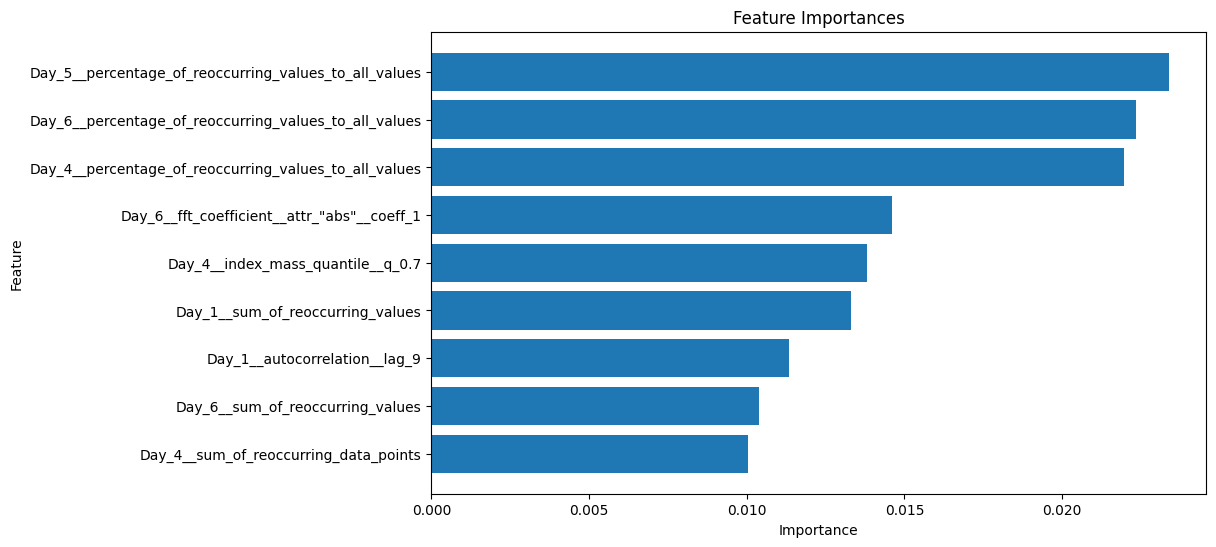

In [ ]:
import matplotlib.pyplot as plt

filtered_features_weeks = feature_importances[feature_importances['importance'] >= 0.01].sort_values('importance', ascending=True)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(filtered_features_weeks['feature'], filtered_features_weeks['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [ ]:
filtered_features_weeks.feature.to_list()

['Day_4__sum_of_reoccurring_data_points',
 'Day_6__sum_of_reoccurring_values',
 'Day_1__autocorrelation__lag_9',
 'Day_1__sum_of_reoccurring_values',
 'Day_4__index_mass_quantile__q_0.7',
 'Day_6__fft_coefficient__attr_"abs"__coeff_1',
 'Day_4__percentage_of_reoccurring_values_to_all_values',
 'Day_6__percentage_of_reoccurring_values_to_all_values',
 'Day_5__percentage_of_reoccurring_values_to_all_values']

In [ ]:
X_train_weeks_filtered = X_train_weeks[filtered_features_weeks.feature.to_list()]
X_test_weeks_filtered = X_test_weeks[filtered_features_weeks.feature.to_list()]
X_train_weeks_filtered

Day_4__sum_of_reoccurring_data_points  \
8839                               13.691510   
9257                                1.337110   
12160                              19.176172   
18689                               4.805061   
2824                                5.624596   
...                                      ...   
33845                               0.000000   
26394                               0.000000   
37230                               0.000000   
13956                               7.045445   
32280                              10.479482   

       Day_6__sum_of_reoccurring_values  Day_1__autocorrelation__lag_9  \
8839                           5.123882                       0.125995   
9257                           0.908170                       0.589183   
12160                          9.366016                       0.040376   
18689                          3.905098                      -0.193795   
2824                           2.837997                       0.556784   
...                                 ...                            ...   
33845                          0.000000                       0.254833   
26394                          0.000000                       0.254833   
37230                          0.000000                       0.254833   
13956                          2.987101                       0.062229   
32280                          5.225450                       0.034593   

       Day_1__sum_of_reoccurring_values  Day_4__index_mass_quantile__q_0.7  \
8839                           3.604194                           0.707483   
9257                           0.276223                           0.918367   
12160                          9.379374                           0.687075   
18689                          2.862671                           0.714286   
2824                           1.248537                           0.850340   
...                                 ...                                ...   
33845                          0.000000                           0.768707   
26394                          0.000000                           0.768707   
37230                          0.000000                           0.768707   
13956                          1.375949                           0.659864   
32280                          6.665064                           0.734694   

       Day_6__fft_coefficient__attr_"abs"__coeff_1  \
8839                                      6.820179   
9257                                     17.979083   
12160                                     1.274818   
18689                                     3.049584   
2824                                     15.961409   
...                                            ...   
33845                                     0.000000   
26394                                     0.000000   
37230                                     0.000000   
13956                                     7.501643   
32280                                     4.683302   

       Day_4__percentage_of_reoccurring_values_to_all_values  \
8839                                            0.097744       
9257                                            0.071429       
12160                                           0.158333       
18689                                           0.042553       
2824                                            0.097826       
...                                                  ...       
33845                                           1.000000       
26394                                           1.000000       
37230                                           1.000000       
13956                                           0.053030       
32280                                           0.118110       

       Day_6__percentage_of_reoccurring_values_to_all_values  \
8839                                            0.098485       
9257                                            0.069767  

In [ ]:
X_train_all_ft_filtered = pd.concat([X_train_filtered, X_train_weeks_filtered], axis=1)
X_test_all_ft_filtered = pd.concat([X_test_filtered, X_test_weeks_filtered], axis=1)
X_train_all_ft_filtered

Value__percentage_of_reoccurring_values_to_all_values  \
8839                                            0.425361       
9257                                            0.118519       
12160                                           0.516129       
18689                                           0.297700       
2824                                            0.209924       
...                                                  ...       
33845                                           1.000000       
26394                                           1.000000       
37230                                           1.000000       
13956                                           0.311844       
32280                                           0.460348       

       Value__percentage_of_reoccurring_datapoints_to_all_datapoints  \
8839                                            0.652089               
9257                                            0.768707               
12160                                           0.781341               
18689                                           0.495627               
2824                                            0.597668               
...                                                  ...               
33845                                           1.000000               
26394                                           1.000000               
37230                                           1.000000               
13956                                           0.553936               
32280                                           0.728863               

       Value__sum_of_reoccurring_data_points  \
8839                              296.226531   
9257                               26.439596   
12160                             377.992350   
18689                             238.248439   
2824                               98.773634   
...                                      ...   
33845                               0.000000   
26394                               0.000000   
37230                               0.000000   
13956                             198.005926   
32280                             226.190636   

       Value__fft_aggregated__aggtype_"skew"  \
8839                                0.773253   
9257                                1.067908   
12160                               0.706244   
18689                               0.692188   
2824                                1.119235   
...                                      ...   
33845                               0.825440   
26394                               0.825440   
37230                               0.825440   
13956                               0.913546   
32280                               0.824980   

       Value__partial_autocorrelation__lag_1  \
8839                                0.735853   
9257                                0.953550   
12160                               0.640674   
18689                               0.585135   
2824                                0.939751   
...                                      ...   
33845                               0.849687   
26394                               0.849687   
37230                               0.849687   
13956                               0.801184   
32280                               0.772805   

       Value__fft_aggregated__aggtype_"variance"  \
8839                                26070.987897   
9257                                22433.029011   
12160                               25927.760905   
18689                               25317.661271   
2824                                22576.350243   
...                                          ...   
33845                               24278.065589   
26394                               24278.065589   
37230                               24278.065589   
13956                               22306.300864   
32280                               24960.667973   

       Value__ind

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf_filtered = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=3)
rf_clf_filtered.fit(X_train_all_ft_filtered, y_train)

y_pred = rf_clf_filtered.predict(X_test_all_ft_filtered)

print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.96      0.64      0.77      7380
           1       0.15      0.70      0.24       657

    accuracy                           0.64      8037
   macro avg       0.55      0.67      0.50      8037
weighted avg       0.89      0.64      0.72      8037

AUC: 0.67 --

With data augmented:
* F1: 0.21
* Recall: 0.33
* Precision: 0.15
* AUC: 0.583

---

Results using df_proccesed_ftrs dataset:
* f1: 0.20
* recall: 0.21
* precision: 0.19
* AUC: 0.566

---

Results of df_red_processed_2016 dataset:
* f1: 0.15
* recall: 0.15
* precision: 0.15
* AUC: 0.537

---
Results of df_red_processed_2016 augmented dataset:
* f1: 0.14
* recall: 0.24
* precision: 0.1
* AUC: 0.522

---


### Rotation Forest Classifier

In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.2/136.2 kB 5.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
print(pd.__version__)

2.1.4


In [ ]:
import sktime
print(sktime.__version__)

0.32.3


In [ ]:
!pip install --upgrade sktime

In [ ]:
from sktime.classification.feature_based import SummaryClassifier

TypeError: DataFrame.__init__() got an unexpected keyword argument 'strict'

In [ ]:
from sktime.classification.feature_based import FreshPRINCE

clf = FreshPRINCE(
    default_fc_parameters="comprehensive",
    n_estimators=200,
    save_transformed_data=False,
    verbose=0,
    n_jobs=1,
)

TypeError: DataFrame.__init__() got an unexpected keyword argument 'strict'

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 3.6 MB/s eta 0:00:00


### XGBoost

In [ ]:
from xgboost import XGBClassifier

# Initialize an XGBClassifier model
model_xgb_full = XGBClassifier()

# Fit the model on the training data
model_xgb_full.fit(X_train, y_train)

y_pred = model_xgb_full.predict(X_test)

In [ ]:
# matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7380
           1       0.62      0.12      0.20       657

    accuracy                           0.92      8037
   macro avg       0.77      0.56      0.58      8037
weighted avg       0.90      0.92      0.90      8037

AUC: 0.555 --

Results using df_proccesed_ftrs dataset:
* f1: 0.20
* recall: 0.12
* precision: 0.77
* AUC: 0.566
---

Results after augmenting X_train of df_red_processed dataset:
* f1: 0.30
* recall: 0.44
* precision: 0.23
* AUC: 0.655

---

Results using important_features dataset:
* f1: 0.25
* recall: 0.16
* precision: 0.69
* AUC: 0.575

---

Results of df_red_processed_2016 dataset:
* f1: 0.05
* recall: 0.03
* precision: 0.67
* AUC: 0.92

---

In [ ]:
y_train_resampled

array([0, 0, 0, ..., 1, 1, 1])

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg_clf = LogisticRegression(random_state=42)
lg_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lg_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred = lg_clf.predict(X_test)

In [ ]:
# matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.50      0.02      0.05       657

    accuracy                           0.92      8037
   macro avg       0.71      0.51      0.50      8037
weighted avg       0.89      0.92      0.88      8037

AUC: 0.511 --

Results using df_proccesed_ftrs dataset:
* f1: 0.10
* recall: 0.05
* precision: 0.45
* AUC: 0.524
---

Results after augmenting X_train of df_red_processed dataset:
* f1: 0.24
* recall: 0.57
* precision: 0.15
* AUC: 0.644

---

Results of df_red_processed_2016 dataset:
* f1: 0.01
* recall: 0.01
* precision: 0.42
* AUC: 0.503

---

In [ ]:
from sklearn.model_selection import StratifiedKFold

lg_clf = LogisticRegression()

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5)
for i, (train_index, test_index) in enumerate(skf.split(X_train_resampled, y_train_resampled)):
  lg_clf.fit(X_train_resampled[train_index], y_train_resampled[train_index])
  y_pred = lg_clf.predict(X_full_test)

  print(f'Fold {i+1}:')
  matrix = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 1:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7380
           1       0.15      0.56      0.24       657

    accuracy                           0.70      8037
   macro avg       0.55      0.64      0.53      8037
weighted avg       0.88      0.70      0.77      8037

AUC: 0.641 --

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 2:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82      7380
           1       0.15      0.58      0.24       657

    accuracy                           0.70      8037
   macro avg       0.55      0.65      0.53      8037
weighted avg       0.88      0.70      0.77      8037

AUC: 0.645 --

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 3:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      7380
           1       0.15      0.57      0.24       657

    accuracy                           0.70      8037
   macro avg       0.55      0.64      0.53      8037
weighted avg       0.88      0.70      0.77      8037

AUC: 0.642 --

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold 4:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      7380
           1       0.15      0.57      0.24       657

    accuracy                           0.70      8037
   macro avg       0.55      0.64      0.52      8037
weighted avg       0.88      0.70      0.77      8037

AUC: 0.639 --Fold 5:
              precision    recall  f1-score   support

           0       0.95      0.71      0.81      7380
           1       0.15      0.57      0.23       657

    accuracy                           0.70      8037
   macro avg       0.55      0.64      0.52      8037
weighted avg       0.88      0.70      0.77      8037

AUC: 0.638 --

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()

# Fit the model on the training data
gb_clf.fit(X_train, y_train)

y_pred = gb_clf.predict(X_test)

In [ ]:
# matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

NameError: name 'classification_report' is not defined

Results using df_proccesed_ftrs dataset:
* f1: 0.12
* recall: 0.07
* precision: 0.69
* AUC: 0.532
---

Results after augmenting X_train of df_red_processed dataset:
* f1: 0.26
* recall: 0.5
* precision: 0.18
* AUC: 0.645

---

Results using important_features dataset:
* f1: 0.21
* recall: 0.13
* precision: 0.66
* AUC: 0.56

---

Results of df_red_processed_2016 dataset:
* f1: 0.0
* recall: 0.0
* precision: 0.
* AUC: 0.

---

In [ ]:
# prompt: need to add a dimmension at the end of X_full_train

import numpy as np
X_full_train_reshaped = np.expand_dims(X_full_train, axis=-1)

In [ ]:
label_red.to_numpy()

CONS_NO
0387DD8A07E07FDA6271170F86AD9151    1
01D6177B5D4FFE0CABA9EF17DAFC2B84    1
B32AC8CC6D5D805AC053557AB05F5343    1
EDFC78B07BA2908B3395C4EB2304665E    1
34C1954AA3703C4F8BD8EAEA7C4B7B83    1
                                   ..
F1472871E1AFF49D4289564B6377D76C    0
F3C8BBCD2DC26C1E0249DEEF6A4256B7    0
A9A0FE83467A680FBFB0DBFC910DF227    0
D9A6ADA018FA46A55D5438370456AA45    0
F3406636BAD1E6E0826E8EDDC9A1BF00    0
Name: FLAG, Length: 40185, dtype: int64

### SVM

In [ ]:
from sklearn.svm import SVC

svc_clf = SVC()

# Fit the model on the training data
svc_clf.fit(X_train_all_ft_filtered, y_train)

y_pred = svc_clf.predict(X_test_all_ft_filtered)

In [ ]:
# matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7380
           1       0.00      0.00      0.00       657

    accuracy                           0.92      8037
   macro avg       0.46      0.50      0.48      8037
weighted avg       0.84      0.92      0.88      8037

AUC: 0.5 --

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Ensemble

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from xgboost import XGBClassifier

# Initialize the base models
# rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=3)
# lr = LogisticRegression(random_state=42, class_weight='balanced')
# xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, max_depth=5)
rf = RandomForestClassifier(random_state=42,
                            bootstrap=True,
                            class_weight= 'balanced_subsample',
                            max_depth= 10,
                            max_features= 'sqrt',
                            min_samples_leaf= 4,
                            min_samples_split= 2,
                            n_estimators= 200)

xgb = XGBClassifier(random_state=42,
                    learning_rate= 0.1,
                    max_depth=5,
                    n_estimators=300,
                    reg_alpha=0,
                    reg_lambda=0,
                    subsample=0.8)

lr = LogisticRegression(random_state=42,
                        C= 100,
                        class_weight='balanced',
                        max_iter= 200,
                        penalty='l1',
                        solver= 'liblinear',
                        )

# Create the ensemble using VotingClassifier
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)],
    voting='soft'  # 'soft' for probability-based voting, 'hard' for majority voting
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Make predictions
y_pred = ensemble.predict(X_test)

# Calculate F1 score for the minority class
minority_class = 1  # Adjust this based on your specific problem
f1 = f1_score(y_test, y_pred, pos_label=minority_class)

print(f"F1 score for minority class: {f1}")

# Print full classification report
print(classification_report(y_test, y_pred))
print('AUC: {:.3} --'.format(roc_auc_score(y_test,y_pred)), end='')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


F1 score for minority class: 0.3833757421543681
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7380
           1       0.43      0.34      0.38       657

    accuracy                           0.91      8037
   macro avg       0.69      0.65      0.67      8037
weighted avg       0.90      0.91      0.90      8037

AUC: 0.652 --

### LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Recall
from sklearn.metrics import f1_score, recall_score, roc_auc_score

# Define input shape
input_shape = (1029, 1)  # (time steps, features)

# Lists to store the metrics for each fold
f1_scores = []
recall_scores = []
auc_scores = []
models = []
model_history = []
k_folds = 5

# Set up the KFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


for i in range(5):
    model = Sequential([
            LSTM(64, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(32, return_sequences=False),
            Dropout(0.2),
            Flatten(),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(1, activation='softmax')
        ])

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=[AUC(name='auc'), Recall(name='recall')])

    models.append(model)



for i, (train_index, test_index) in enumerate(skf.split(df_proccesed_ftrs.to_numpy(), label_red.to_numpy())):
    print(f'Fold {i+1} / {k_folds}')
    print(train_index)
    print(test_index)
    # Split the data into training and validation sets for this fold
    X_train, X_val = df_proccesed_ftrs.iloc[train_index], df_proccesed_ftrs.iloc[test_index]
    y_train, y_val = label_red[train_index], label_red[test_index]

    X_train_reshaped = np.expand_dims(X_train, axis=-1)
    X_test_reshaped = np.expand_dims(X_val, axis=-1)

    history = model.fit(X_train_reshaped, y_train,
              epochs=20,
              batch_size=100,
              validation_data=(X_test_reshaped, y_val),
              shuffle=True,
              verbose=0)

    y_val_pred = model.predict(X_val)
    y_val_pred_classes = np.argmax(y_val_pred, axis=1)

    f1 = f1_score(y_val, y_val_pred_classes, average='binary')
    recall = recall_score(y_val, y_val_pred_classes, pos_label=1)  # assuming '1' is the minority class label
    auc = roc_auc_score(y_val, y_val_pred_classes)

    print(f'F1 Score: {f1} - Recall: {recall} - AUC: {auc}')
    f1_scores.append(f1)
    recall_scores.append(recall)
    auc_scores.append(auc)
    model_history.append(history)
    print("-------------------")

# Calculate and print the average metrics across all folds
avg_f1 = np.mean(f1_scores)
avg_recall = np.mean(recall_scores)
avg_auc = np.mean(auc_scores)

print(f'Average F1 Score across 5 folds: {avg_f1}')
print(f'Average Recall (Minority Class) across 5 folds: {avg_recall}')
print(f'Average AUC across 5 folds: {avg_auc}')

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Train the model
# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 / 5
[    0     1     2 ... 40182 40183 40184]
[    7    11    12 ... 40173 40175 40180]


<ipython-input-73-a56fc38537e0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]
/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


  3/252 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


F1 Score: 0.0 - Recall: 0.0 - AUC: 0.5
-------------------
Fold 2 / 5
[    0     1     2 ... 40178 40180 40182]
[    6    14    23 ... 40181 40183 40184]


<ipython-input-73-a56fc38537e0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]


252/252 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step
F1 Score: 0.0 - Recall: 0.0 - AUC: 0.5
-------------------
Fold 3 / 5
[    0     1     5 ... 40182 40183 40184]
[    2     3     4 ... 40172 40174 40176]


<ipython-input-73-a56fc38537e0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]


252/252 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
F1 Score: 0.0 - Recall: 0.0 - AUC: 0.5
-------------------
Fold 4 / 5
[    1     2     3 ... 40181 40183 40184]
[    0     8    43 ... 40177 40178 40182]


<ipython-input-73-a56fc38537e0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]


252/252 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step
F1 Score: 0.0 - Recall: 0.0 - AUC: 0.5
-------------------
Fold 5 / 5
[    0     2     3 ... 40182 40183 40184]
[    1     5    10 ... 40151 40154 40171]


<ipython-input-73-a56fc38537e0>:50: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_val = label_red[train_index], label_red[test_index]


252/252 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step
F1 Score: 0.0 - Recall: 0.0 - AUC: 0.5
-------------------
Average F1 Score across 5 folds: 0.0
Average Recall (Minority Class) across 5 folds: 0.0
Average AUC across 5 folds: 0.5


Results using df_proccesed_ftrs dataset:
* f1: 0.0
* recall: 0.00
* precision: --
* AUC: 0.5
---

### Logistic regression, RF, Gradient Boosting

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, f1_score

# Define the models you want to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Define custom scorers
recall_scorer = make_scorer(recall_score, pos_label=1)  # 1 is the fraudulent class
f1_scorer = make_scorer(f1_score, pos_label=1)

# Create a pipeline and evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline([
        ('model', model)
    ])

    recall_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring=recall_scorer)
    f1_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=5, scoring=f1_scorer)

    # scores = cross_val_score(pipeline, X_full_train, y_train, cv=5, scoring='roc_auc')
    # print(f"{name} ROC-AUC: {scores.mean():.2f} (+/- {scores.std():.2f})")

    print(f"{name}:")
    print(f"  Recall: {recall_scores.mean():.2f} (+/- {recall_scores.std():.2f})")
    print(f"  F1-score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")

# Train the best model on the full training set and make predictions on the test set
# best_model = GradientBoostingClassifier()  # Or the model with the highest ROC-AUC score
# best_pipeline = Pipeline([
#     ('model', best_model)
# ])
# best_pipeline.fit(X_full_train, y_train)
# y_pred = best_pipeline.predict(X_full_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression:
  Recall: 0.77 (+/- 0.02)
  F1-score: 0.75 (+/- 0.01)
Random Forest:
  Recall: 0.96 (+/- 0.04)
  F1-score: 0.96 (+/- 0.02)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, f1_score

gradient_model = GradientBoostingClassifier()

recall_scorer = make_scorer(recall_score, pos_label=1)  # 1 is the fraudulent class
f1_scorer = make_scorer(f1_score, pos_label=1)

recall_scores = cross_val_score(gradient_model, X_train_resampled, y_train_resampled, cv=5, scoring=recall_scorer)
# f1_scores = cross_val_score(gradient_model, X_train_resampled, y_train_resampled, cv=5, scoring=f1_scorer)

# scores = cross_val_score(pipeline, X_full_train, y_train, cv=5, scoring='roc_auc')
# print(f"{name} ROC-AUC: {scores.mean():.2f} (+/- {scores.std():.2f})")

print(f"{name}:")
print(f"  Recall: {recall_scores.mean():.2f} (+/- {recall_scores.std():.2f})")
print(f"  F1-score: {f1_scores.mean():.2f} (+/- {f1_scores.std():.2f})")